# HR-аналитика

**Цель исследования:** Разработка решения, которое позволит предсказать уровень удовлетворенности сотрудника компании и вероятность увольнения сотрудника. Это позволит минимизировать отток ценных сотрудников из компании и сэкономит деньги.

**Описание проекта:**  HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
1. Используя машинное обучение, необходимо построить модель, которая сможет предсказать уровень удовлетворенности сотрудника на основе данных заказчика.
Удовлетворенность напрямую влияет на отток сотрудников.
2. Необходимо Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании. 

**Описание данных:**

Файлы с данными:
* Тренировочная выборка:
train_job_satisfaction_rate.csv
* Входные признаки тестовой выборки:
test_features.csv
* Целевой признак тестовой выборки:
test_target_job_satisfaction_rate.csv
* Тренировочная выборка для второй задачи:
train_quit.csv
* Входные признаки тестовой выборки те же, что и в прошлой задаче:
test_features.csv
* Целевой признак тестовой выборки:
test_target_quit.csv

**Ход исследования:**

Задача 1: предсказание уровня удовлетворенности сотрудника

* Шаг 1. Подготовка данных: загрузка и изучений общей информации;
* Шаг 2. Предобработка данных: приведение к верному типу данных, добавление новых столбцов, обработка пропущенных значений, дубликатов и аномалий;
* Шаг 3. Исследовательский анализ данных
* Шаг 4. Подготовка данных перед обучением;
* Шаг 5. Обучение моделей, выбор лучшей с помощью метрики SMAPE, предсказание модели;

Задача 2: предсказание увольнения сотрудника из компании

* Шаг 1. Подготовка данных: загрузка и изучений общей информации;
* Шаг 2. Предобработка данных: приведение к верному типу данных, добавление новых столбцов, обработка пропущенных значений, дубликатов и аномалий;
* Шаг 3. Исследовательский анализ данных
* Шаг 4. Добавление нового входного признака;
* Шаг 5. Подготовка данных перед обучением;
* Шаг 6. Обучение моделей, выбор лучшей с помощью метрики SMAPE, предсказание модели;
* Шаг 7. Общий вывод: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

# Задача 1: предсказание уровня удовлетворенности сотрудника

## Подготовка данных: загрузка и изучений общей информации

### Установка необходимых версий, загрузки библиотек объявление констант

In [1]:
!pip install phik

In [2]:
!pip install -U scikit-learn

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import r2_score, make_scorer, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor, DummyClassifier
import scipy.stats as st

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

### Считываем данные из файлов

In [3]:
train_job = pd.read_csv('train_job_satisfaction_rate.csv')

In [4]:
test_features = pd.read_csv('test_features.csv')

In [5]:
test_target_train_job = pd.read_csv('test_target_job_satisfaction_rate.csv')

### Изучим данные: выведем статистику по каждому датасету и описание

In [6]:
def data_characteristics(df):
    return display(df.head(10), df.info())

In [7]:
data_characteristics(train_job)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


None

**Вывод:** В тренировочном датасете 4000 строк и 10 столбцов, есть пропуски, их необходимо будет удалить. Типы данных в порядке.

In [8]:
data_characteristics(test_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


None

**Вывод:** В тестовом датасете 2000 строк и 9 столбцов (все признаки за исключением целевого на месте), есть пропуски. Типы данных в порядке.

In [9]:
data_characteristics(test_target_train_job)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


None

**Вывод:** В тестовом датасете с целевым признаком 2000 строк и 2 столбца (все признаки за исключением целевого на месте), пропусков нет. Тип данных в порядке. Размерность датасета соответствует тестовому.

Данные соответсвуют описанию, перейдем к предобработке.

## Предобработка данных

### Обработаем дубликаты

#### Явные дубликаты

In [10]:
train_job.duplicated().sum()

0

In [11]:
test_features.duplicated().sum()

0

In [12]:
test_target_train_job.duplicated().sum()

0

Явных дубликатов нет

#### Неявные дубликаты

In [13]:
cols = ['dept', 'level', 'workload']
for col in cols:
    print(train_job[col].unique())

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'high' 'low']


In [14]:
for col in cols:
    print(test_features[col].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']


Неявных дубликатов нет, но есть пропуски

In [15]:
train_job['level'].replace('sinior', 'senior', inplace=True)

In [16]:
test_features['level'].replace('sinior', 'senior', inplace=True)

In [17]:
for col in cols:
    print(train_job[col].unique())

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'senior' nan]
['medium' 'high' 'low']


In [18]:
for col in cols:
    print(test_features[col].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'senior' nan]
['medium' 'low' 'high' ' ']


### Обработаем аномальные значения

In [19]:
train_job.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


In [20]:
test_features.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


In [21]:
test_target_train_job.describe()

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


Аномалий нет

### Обработаем пропуски

Пропуски обработаем на этапе создания пайплайна

## Исследовательский анализ данных

### Построим распределения признаков

**Построим графики для дискретных признаков тренировочного и тестового датасетов**

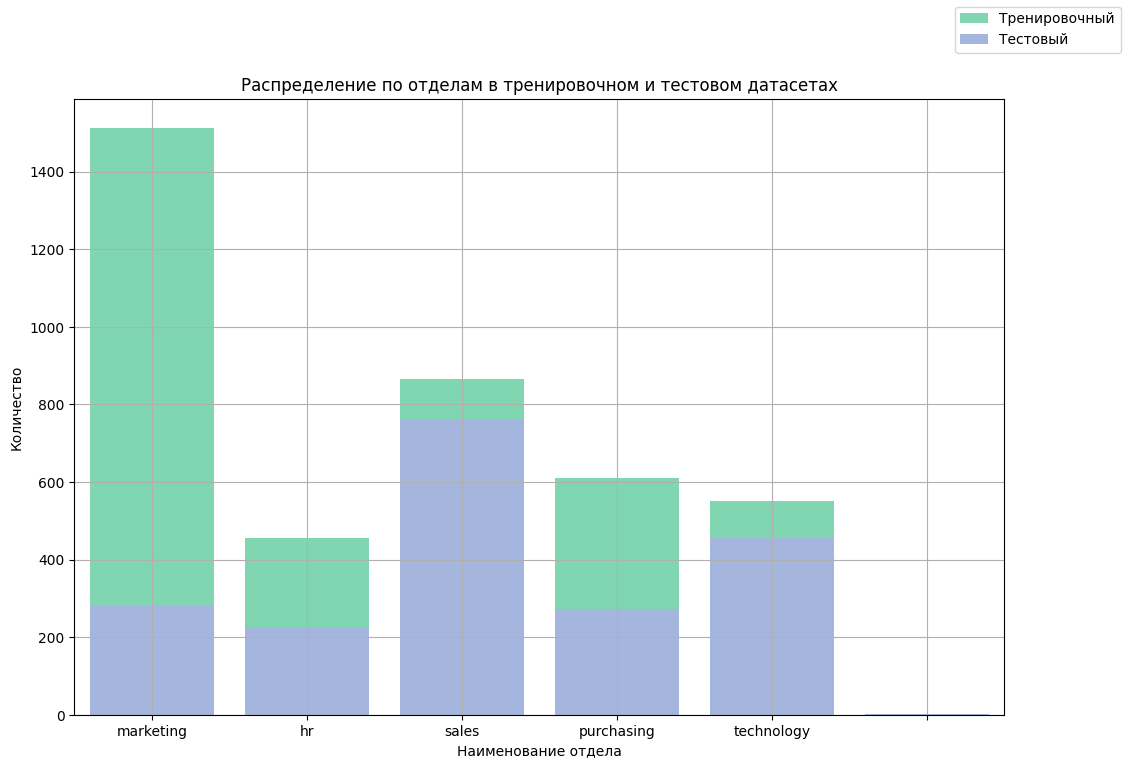

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_job, x='dept', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='dept', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Наименование отдела", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по отделам в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

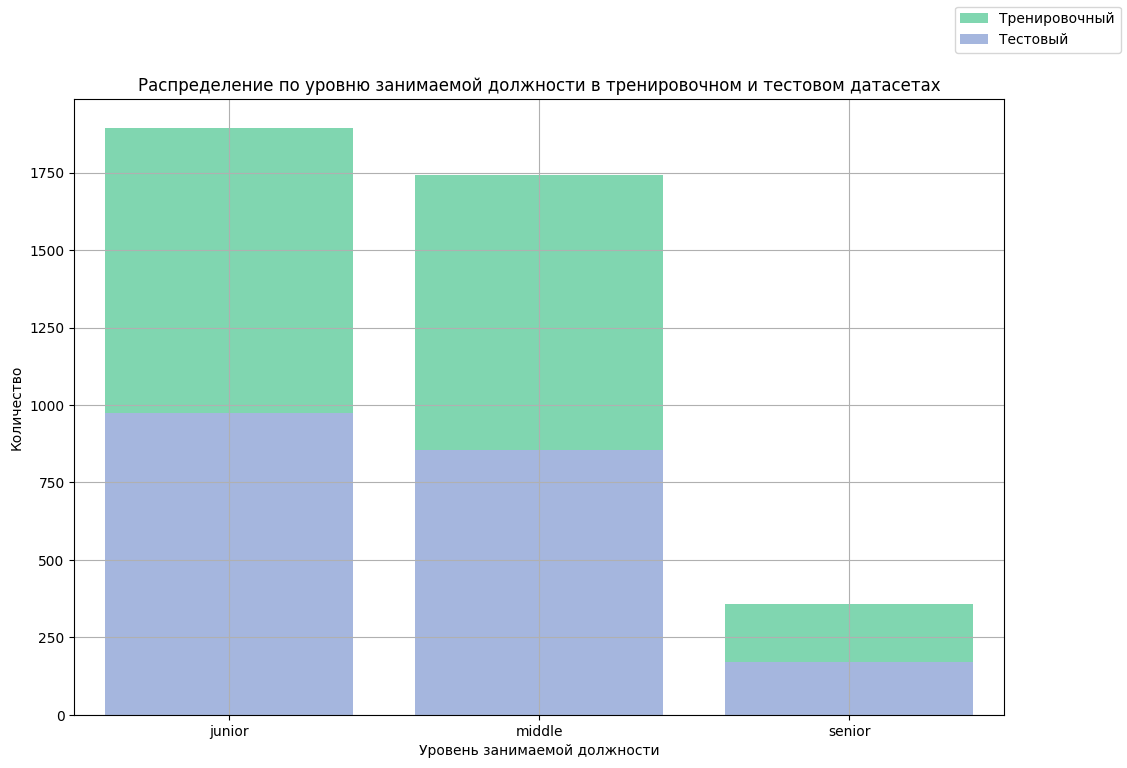

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_job, x='level', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='level', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Уровень занимаемой должности", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по уровню занимаемой должности в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

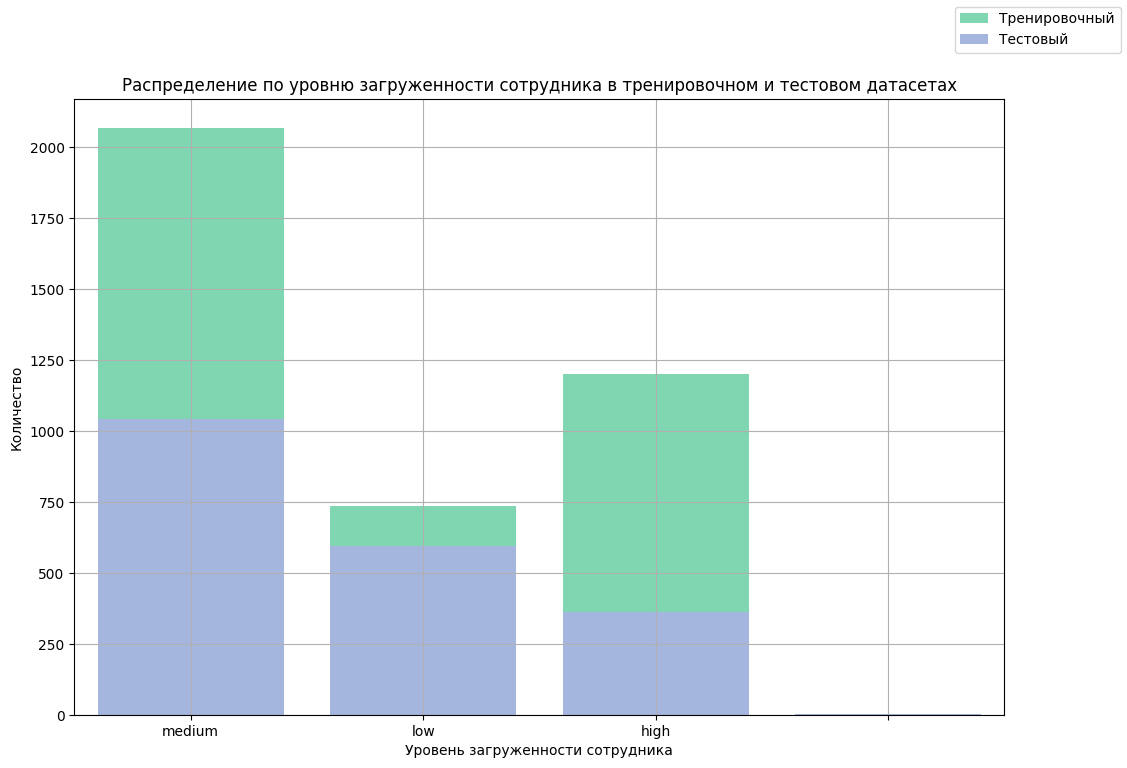

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_job, x='workload', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='workload', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Уровень загруженности сотрудника", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по уровню загруженности сотрудника в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

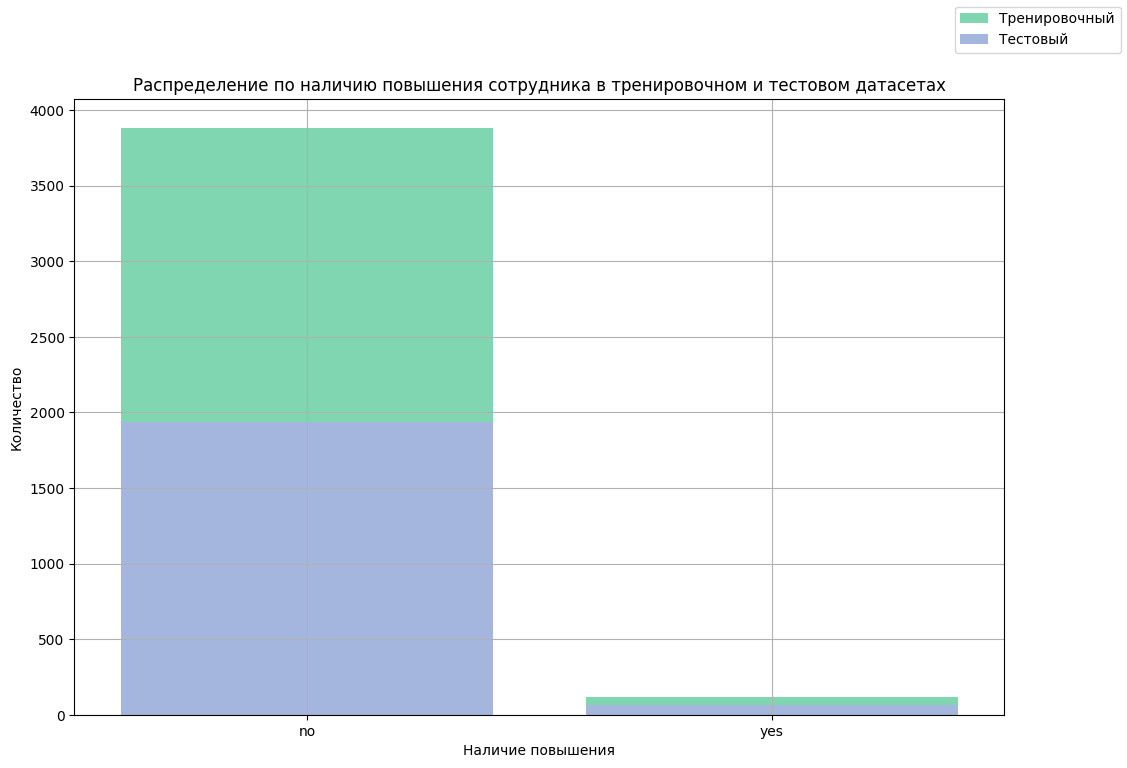

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_job, x='last_year_promo', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='last_year_promo', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Наличие повышения", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по наличию повышения сотрудника в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

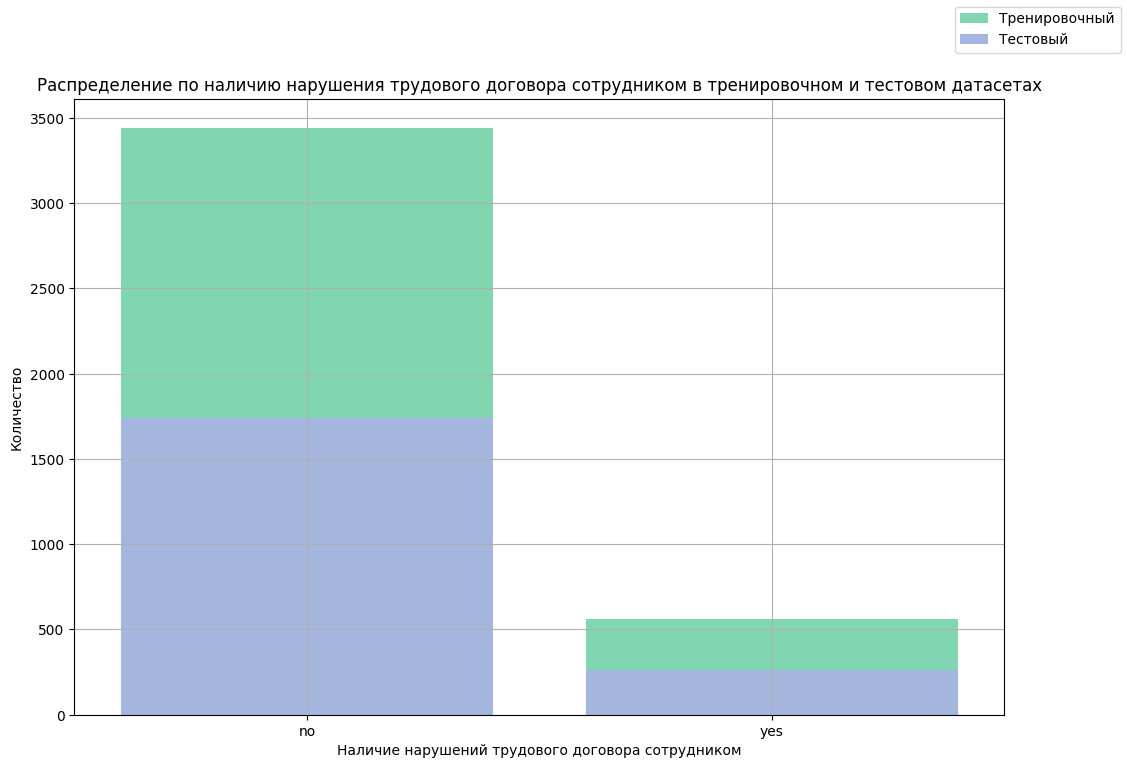

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_job, x='last_year_violations', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='last_year_violations', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Наличие нарушений трудового договора сотрудником", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по наличию нарушения трудового договора сотрудником в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

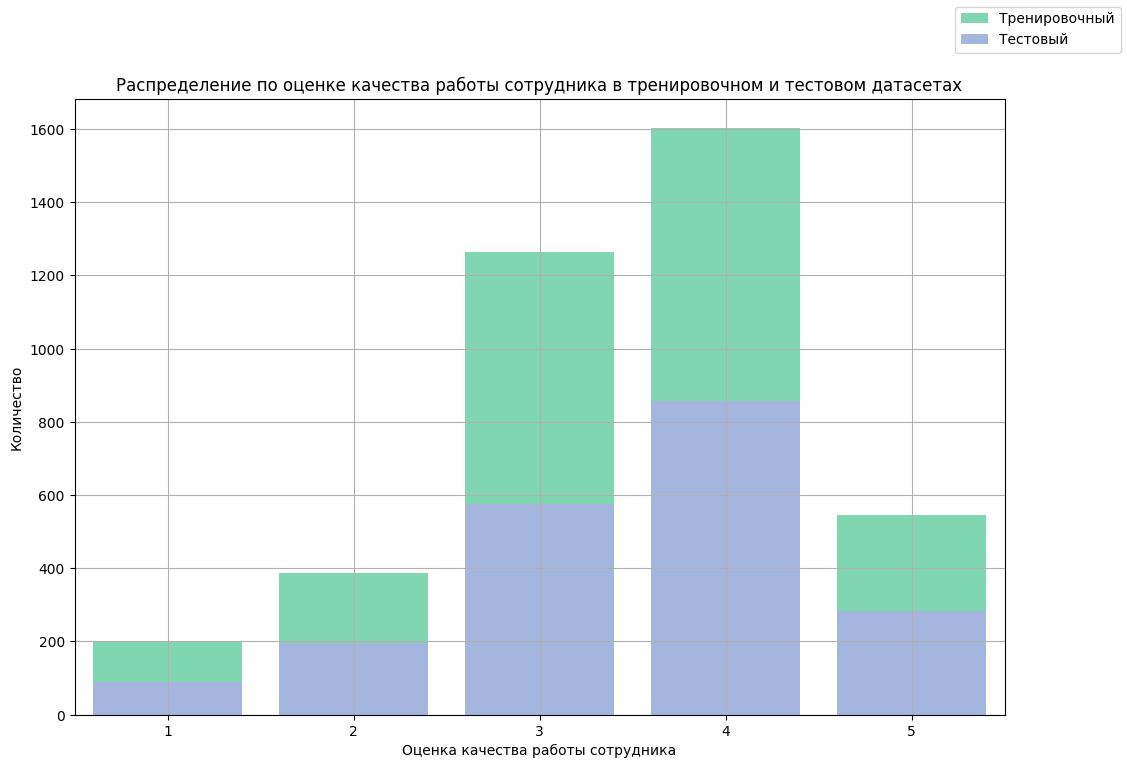

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_job, x='supervisor_evaluation', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='supervisor_evaluation', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Оценка качества работы сотрудника", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по оценке качества работы сотрудника в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

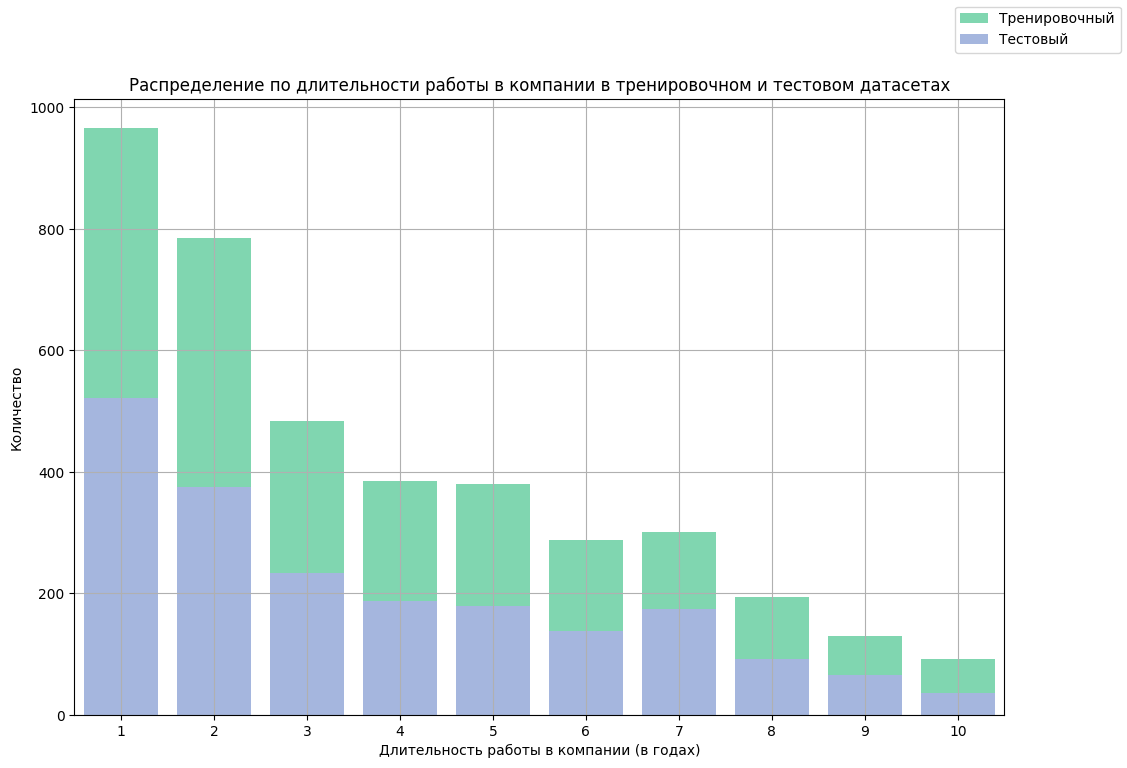

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_job, x='employment_years', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='employment_years', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Длительность работы в компании (в годах)", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по длительности работы в компании в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

**Построим гистограммы и boxplot для непрервыных признаков признаков тренировочного датасета**

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


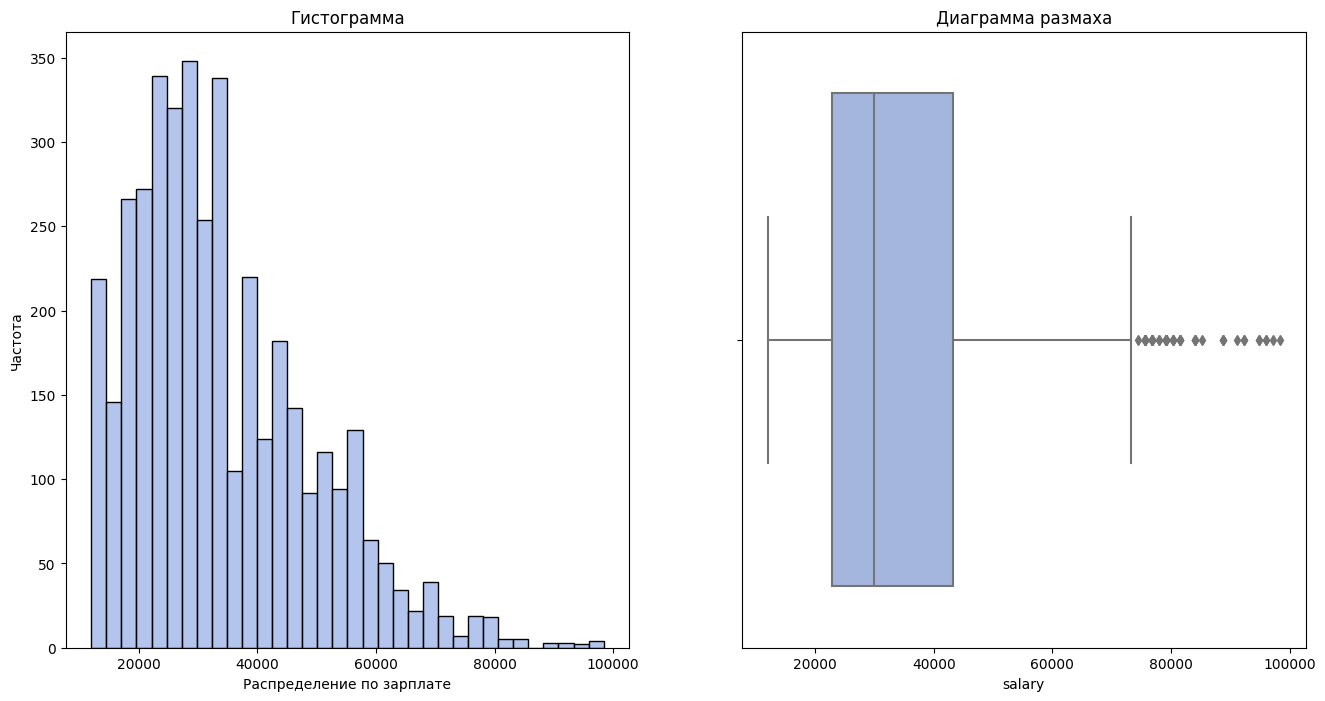

In [29]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = train_job, x = 'salary', ax=axs[0], color='#9BB2E8')
axs[0].set_xlabel('Распределение по зарплате')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = train_job, x = 'salary', ax=axs[1], color='#9BB2E8')
axs[1].set_title('Диаграмма размаха')
plt.show()

In [30]:
train_job['salary'].describe()

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


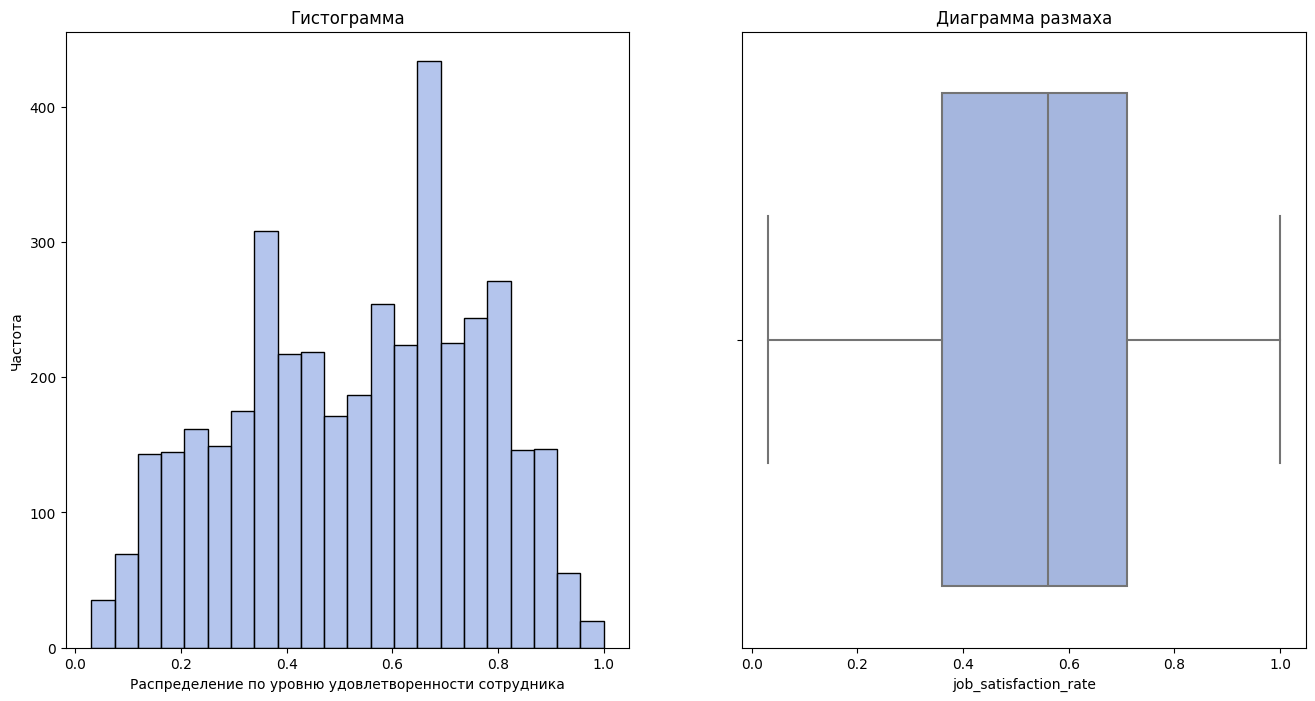

In [31]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = train_job, x = 'job_satisfaction_rate', ax=axs[0], color='#9BB2E8')
axs[0].set_xlabel('Распределение по уровню удовлетворенности сотрудника')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = train_job, x = 'job_satisfaction_rate', ax=axs[1], color='#9BB2E8')
axs[1].set_title('Диаграмма размаха')
plt.show()

In [32]:
train_job['job_satisfaction_rate'].describe()

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

**Сделаем то же самое для тестового датасета**

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


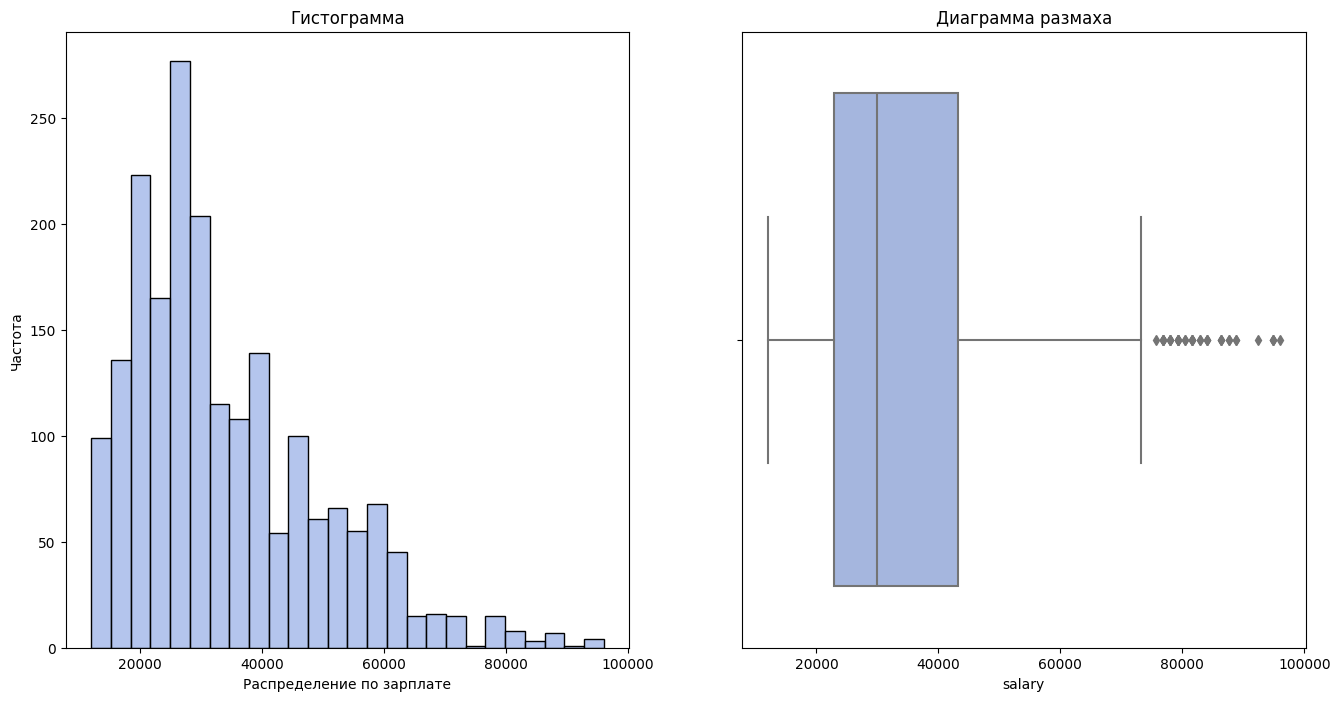

In [33]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = test_features, x = 'salary', ax=axs[0], color='#9BB2E8')
axs[0].set_xlabel('Распределение по зарплате')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = test_features, x = 'salary', ax=axs[1], color='#9BB2E8')
axs[1].set_title('Диаграмма размаха')
plt.show()

In [34]:
test_features['salary'].describe()

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


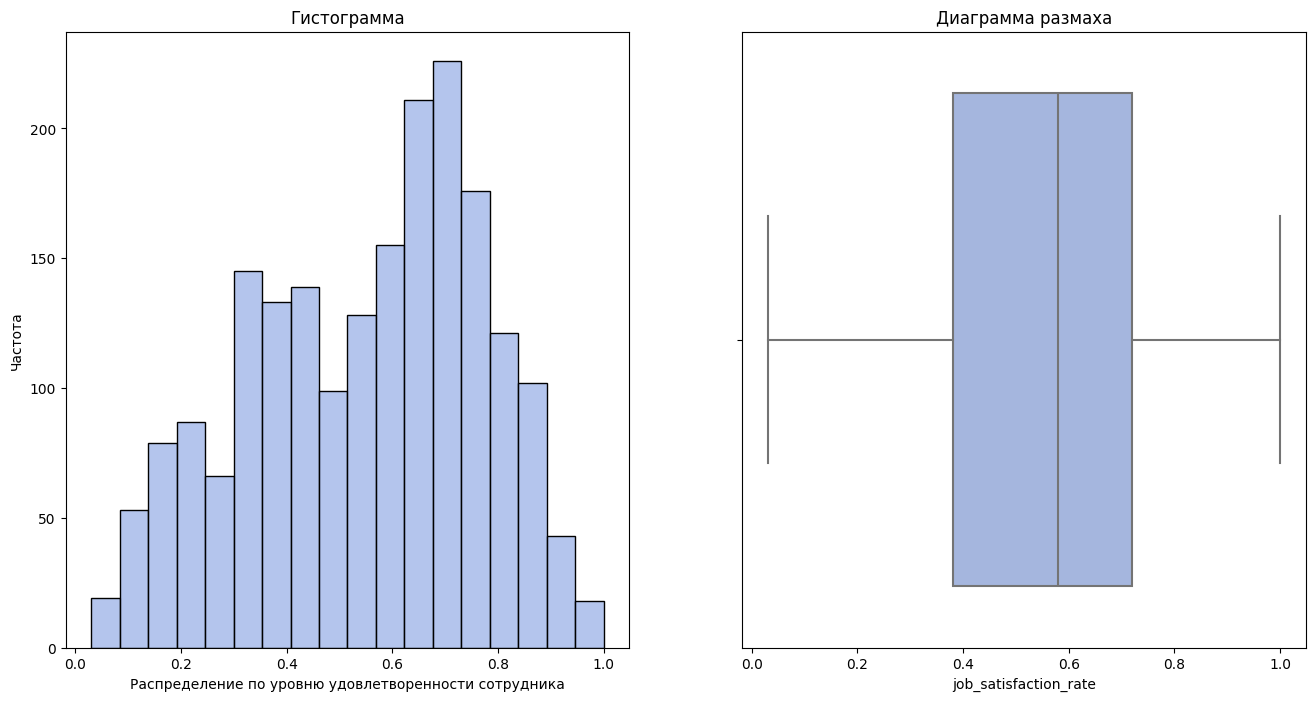

In [35]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = test_target_train_job, x = 'job_satisfaction_rate', ax=axs[0], color='#9BB2E8')
axs[0].set_xlabel('Распределение по уровню удовлетворенности сотрудника')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = test_target_train_job, x = 'job_satisfaction_rate', ax=axs[1], color='#9BB2E8')
axs[1].set_title('Диаграмма размаха')
plt.show()

**Вывод**:
    
1. Признак "Наименование отдела" и  "Уровень загруженности" в тренировочной и тестовом датасете распределен неравномерно.
2. Основная часть зарплат лежит в диапазоне от 22 тысяч до 43 тысяч, но есть выбивающиеся значения больше 80 тысяч, но их нельзя считать аномалиями, скорее всего это зарплата руководства компании.
3. Распределение целевого признака похоже на нормальное, аномалий нет.

### Проведем корреляционный анализ

**Построим тепловую карту и расчитаем коэффициенты корреляции для тренировочной выборки**

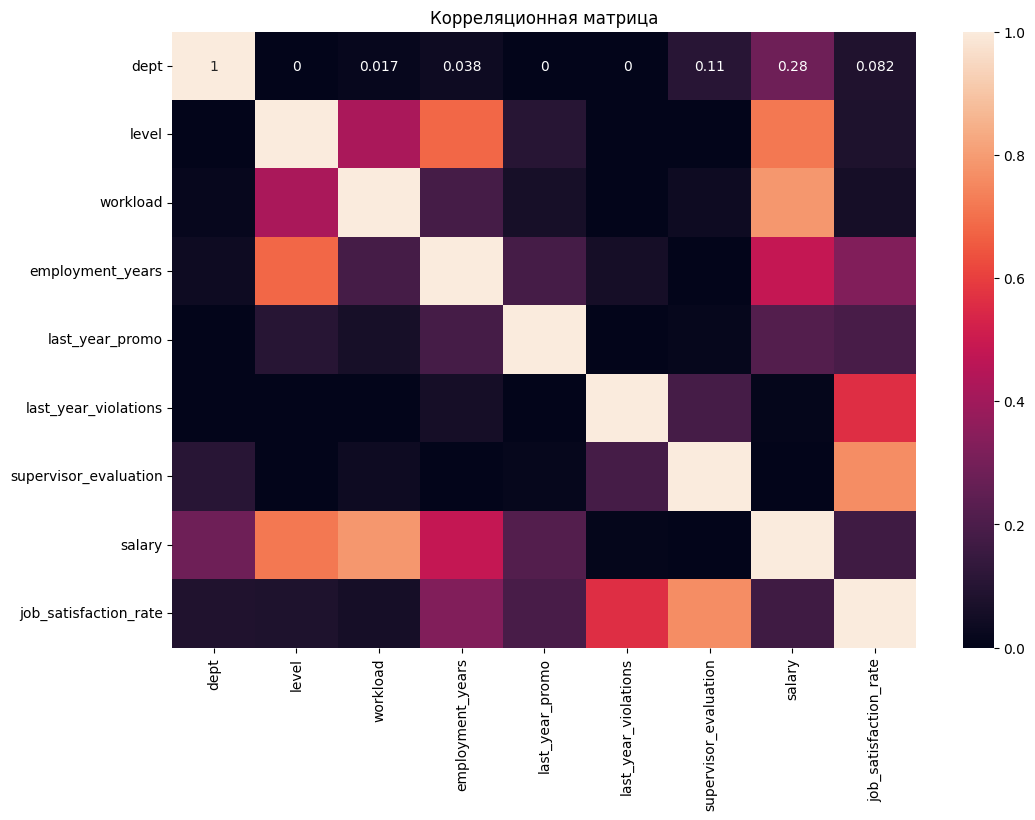

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_job.drop(['id'], axis=1).phik_matrix(interval_cols=['job_satisfaction_rate','salary']), annot=True)
plt.title('Корреляционная матрица')
plt.show()

**Вывод**:
    
Коллинеарность есть между целевым признаком и оценкой качества работы.
Мультиколлинеарности нет, входные признаки между собой не коррелируют.

**Построим тепловую карту и расчитаем коэффициенты корреляции для тестовой выборки**

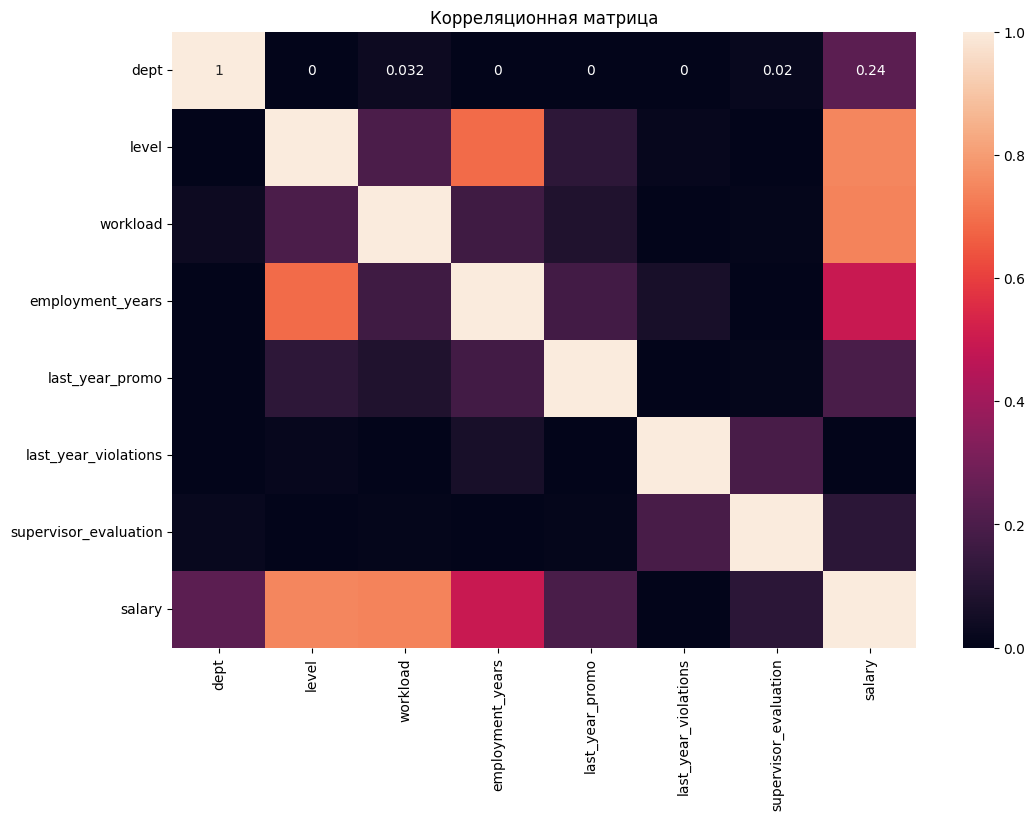

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(test_features.drop(['id'], axis=1).phik_matrix(interval_cols=['salary']), annot=True)
plt.title('Корреляционная матрица')
plt.show()

Существенных различий в части распределений признаков между тренировочной и тестовой выборкой нет.

## Подготовка данных

In [38]:
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [39]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [40]:
train_job.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [41]:
test_target_train_job.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [42]:
train_job.set_index('id', inplace=True)
test_target_train_job.set_index('id', inplace=True)
test_features.set_index('id', inplace=True)

Посмотрим есть ли явные дубликаты после сброса индекса

In [43]:
train_job.duplicated().sum()

245

In [44]:
train_job = train_job.drop_duplicates()

In [45]:
train_job.duplicated().sum()

0

Объединим таблицы

In [46]:
test_df = test_features.join(test_target_train_job, how='inner')
test_df.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [47]:
len(test_df)

2000

In [48]:
null_data = test_df[test_df.isnull().any(axis=1)]
null_data

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
609865,NaN,junior,medium,1,no,no,1,20400,0.12
471990,sales,NaN,low,1,no,no,3,12000,0.17
832342,NaN,junior,medium,1,no,no,4,28800,0.61


In [49]:
test_df = test_df.dropna()

In [50]:
null_data = test_df[test_df.isnull().any(axis=1)]
null_data

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,


Подготовим признаки перед обучением модели: закодируем категориальные признаки, масштабируем количественные. Для подготовки признаков и выбора лучшей модели будем использовать пайплайны.

In [51]:
X_test = test_df.drop(['job_satisfaction_rate'], axis=1)
y_test = test_df['job_satisfaction_rate']
X_train = train_job.drop(['job_satisfaction_rate'], axis=1)
y_train = train_job['job_satisfaction_rate']

In [52]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']

In [53]:
num_columns = ['employment_years', 'salary']

In [54]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [55]:
for col in ord_columns:
    print(train_job[col].unique())

['junior' 'middle' 'senior' nan]
['medium' 'high' 'low']


In [56]:
ord_pipe = Pipeline(
    [
        ('simpleImputer_ord_before', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('num', OrdinalEncoder(
            categories=[
                ['junior', 'middle', 'sinior'],
                ['medium', 'high', 'low']
            ],
            handle_unknown='use_encoded_value', unknown_value=np.nan
        )),
        ('simpleImputer_ord_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [57]:
num_pipe = Pipeline(
    [
        ('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

In [58]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', num_pipe, num_columns)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [59]:
data_preprocessor.fit(X_train, y_train)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_ord_be...
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'sinior'],
                                                                             ['medium',
                                                                              'high',
                                                                              'low']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('simpleImputer_ord_after',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['level', 'workload']),
                                ('num',
                                 Pipeline(steps=[('simpleImputer_num',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['employment_years', 'salary'])])

## Обучение моделей

Выбирать модель будем на основе метрики SMAPE - симметричное среднее абсолютное процентное отклонение, метрику создадим самостоятельно

In [60]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE)) 
    ]  
)

In [61]:
param_grid = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,30),
        'models__max_features': range(2,20),
        'models__min_samples_split': range(2,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
]

In [62]:
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    diff = (np.abs(y_true - y_pred)) / ((np.abs(y_true) + np.abs(y_pred)) / 2)  
    return 100 * np.mean(diff)

smape_scorer = make_scorer(smape, greater_is_better=False)

In [63]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,  
    n_jobs=-1,
    random_state = RANDOM_STATE,
    error_score='raise'
)

In [64]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'l...
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [DecisionTreeRegressor(random_state=42)],
                                         'models__max_depth': range(2, 30),
                                         'models__max_features': range(2, 20),
                                         'models__min_samples_split': range(2, 20),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [65]:
best_metric = -randomized_search.best_score_
best_metric

15.631185966053053

In [66]:
best_model = randomized_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeli...
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'sinior'],
                                                                                              ['medium',
                                                                                               'high',
                                                                                               'low']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_ord_after',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', 'passthrough',
                                                  ['employment_years',
                                                   'salary'])])),
                ('models',
                 DecisionTreeRegressor(max_depth=24, max_features=15,
                                       min_samples_split=11,
                                       random_state=42))])

In [67]:
X_test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


In [68]:
y_pred = randomized_search.predict(X_test)

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [69]:
y_pred_result = pd.DataFrame(y_pred, index=X_test.index, columns=['job_satisfaction_rate'])
y_pred_result

,job_satisfaction_rate
id,
485046,0.885000
686555,0.682222
467458,0.652000
418655,0.666000
789145,0.825556
...,...
393147,0.494000
109582,0.166667
305653,0.170000


In [70]:
smape_test = smape(y_test, y_pred)
smape_test

13.921230649949296

In [71]:
smape_test

13.921230649949296

Лучшая модель - DecisionTreeRegressor(max_depth=24, max_features=15, min_samples_split=11,  random_state=42. )Лучшая метрика на кросс валидации - 15,6 на тестовой выборке 13,9.

Проверим лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу

In [72]:
dummy_model_regr = DummyRegressor()
dummy_model_regr.fit(X_train, y_train)

dummy_model_regr_preds = dummy_model_regr.predict(X_test)

dummy_acc_regr = smape(y_test, dummy_model_regr_preds)
dummy_acc_regr

38.19794992818311

In [73]:
Выбор модели оправдан.

SyntaxError: invalid syntax (1515693970.py, line 1)

**Вывод**:
    
Для задачи я выбрала две модели: дерево решений и линейную регрессию. Лучшие показатели получились у дерева решений. Пришлось настроить гипермапараметры, чтобы получить метрику, соответствующую критериям успеха. Изначальна модель переобучилась, но после добавления гиперпараметра "минимальное числа объектов в узле" метрика значительно улучшилась, так как это уменьшило сложность модели.

# Задача 2: предсказание увольнения сотрудника компании

## Подготовка данных: загрузка и изучений общей информации

### Считываем данные из файлов

In [74]:
train_quit = pd.read_csv('train_quit.csv')

In [75]:
test_features = pd.read_csv('test_features.csv')

In [76]:
test_target_quit = pd.read_csv('test_target_quit.csv')

### Изучим данные: выведем статистику по каждому датасету и описание

In [77]:
def data_characteristics(df):
    return display(df.head(10), df.info())

In [78]:
data_characteristics(train_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


None

**Вывод:** В тренировочном датасете 4000 строк и 10 столбцов, пропусков нет. Типы данных в порядке.

In [79]:
data_characteristics(test_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


None

**Вывод:** В тренировочном датасете 2000 строк и 9 столбцов, есть пропуски, их необходимо будет заполнить. Типы данных в порядке.

In [80]:
data_characteristics(test_target_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


None

**Вывод:** В тренировочном датасете с целевым признаком 2000 строк, столько же, сколько в тренировочном, пропусков нет. Типы данных в порядке.

## Предобработка данных

### Обработаем дубликаты

#### Явные дубликаты

In [81]:
train_quit.duplicated().sum()

0

In [82]:
test_features.duplicated().sum()

0

In [83]:
test_target_quit.duplicated().sum()

0

Явных дубликатов нет

#### Неявные дубликаты

In [84]:
cols = ['dept', 'level', 'workload']
for col in cols:
    print(train_quit[col].unique())

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'sinior']
['high' 'medium' 'low']


In [85]:
cols = ['dept', 'level', 'workload']
for col in cols:
    print(test_features[col].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']


In [86]:
test_target_quit['quit'].unique()

array(['yes', 'no'], dtype=object)

Неявных дубликатов нет, но есть пропуски

Исправим грамматическую ошибку в слове senior

In [87]:
train_quit['level'].replace('sinior', 'senior', inplace=True)

In [88]:
test_features['level'].replace('sinior', 'senior', inplace=True)

In [89]:
cols = ['dept', 'level', 'workload']
for col in cols:
    print(train_quit[col].unique())

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'senior']
['high' 'medium' 'low']


In [90]:
cols = ['dept', 'level', 'workload']
for col in cols:
    print(test_features[col].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'senior' nan]
['medium' 'low' 'high' ' ']


### Обработаем аномальные значения

In [91]:
train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


In [92]:
test_features.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Аномалий нет

### Обработаем пропуски

Пропуски обработаем на этапе подготовки к обучению

## Исследовательский анализ данных

### Построим распределения признаков

**Посмотрим, как распеределен целевой признак в тренировочном и тестовом датасетах**

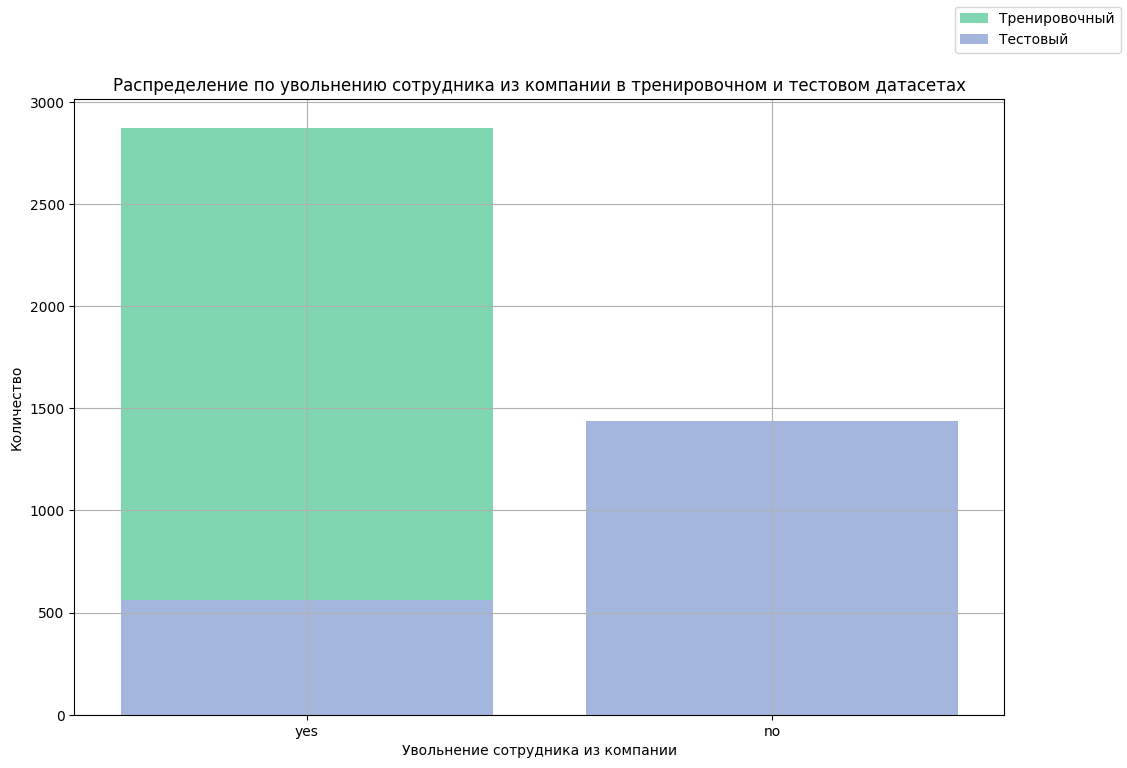

In [93]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_quit, x='quit', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_target_quit, x='quit', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Увольнение сотрудника из компании", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по увольнению сотрудника из компании в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

**Построим графики для дискретных признаков тренировочного и тестового датасетов**

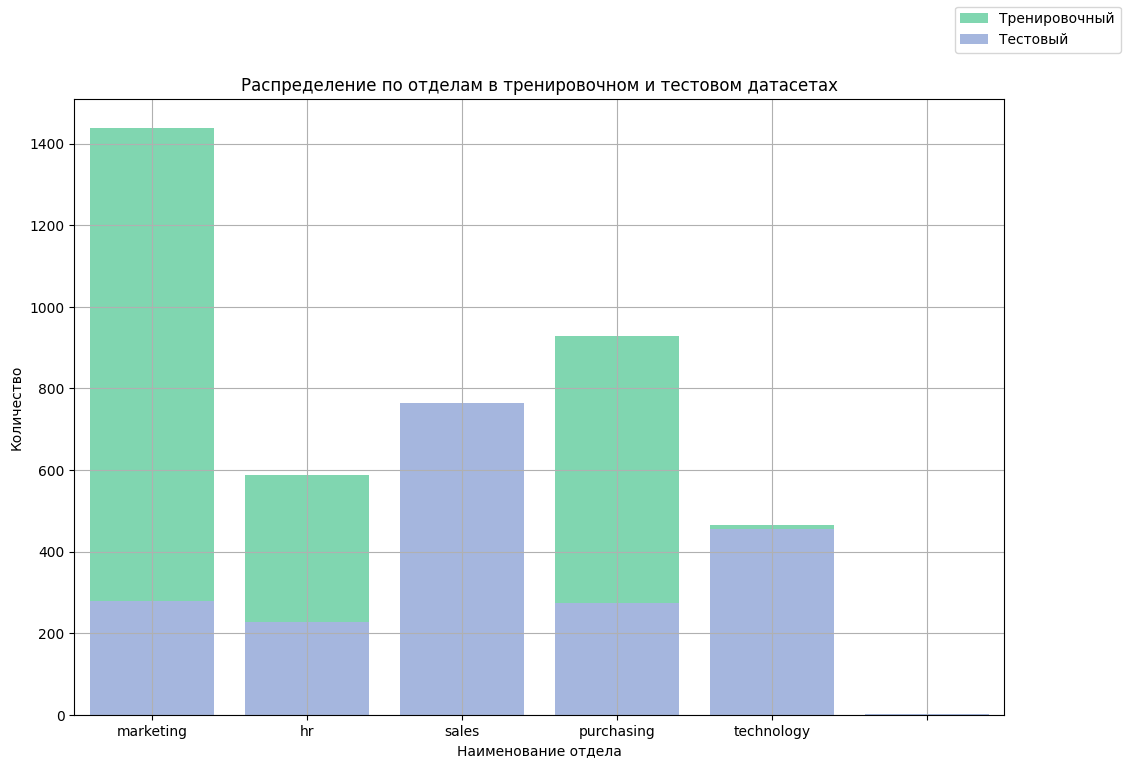

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_quit, x='dept', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='dept', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Наименование отдела", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по отделам в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

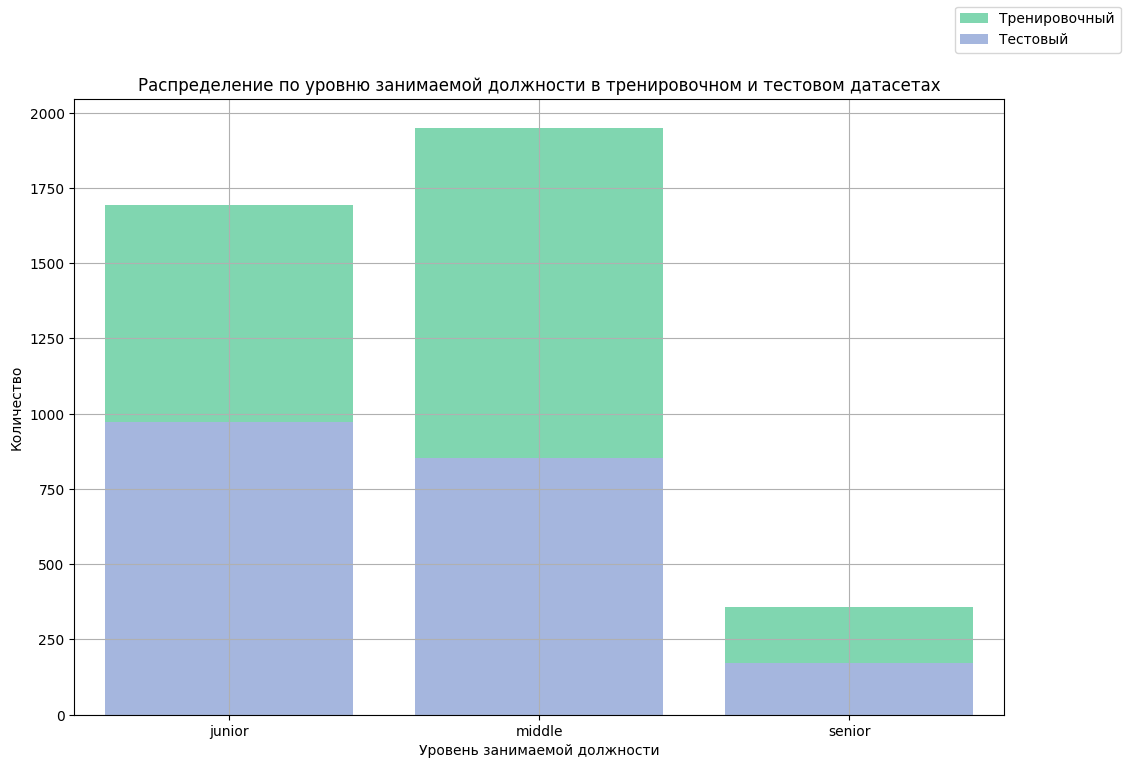

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_quit, x='level', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='level', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Уровень занимаемой должности", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по уровню занимаемой должности в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

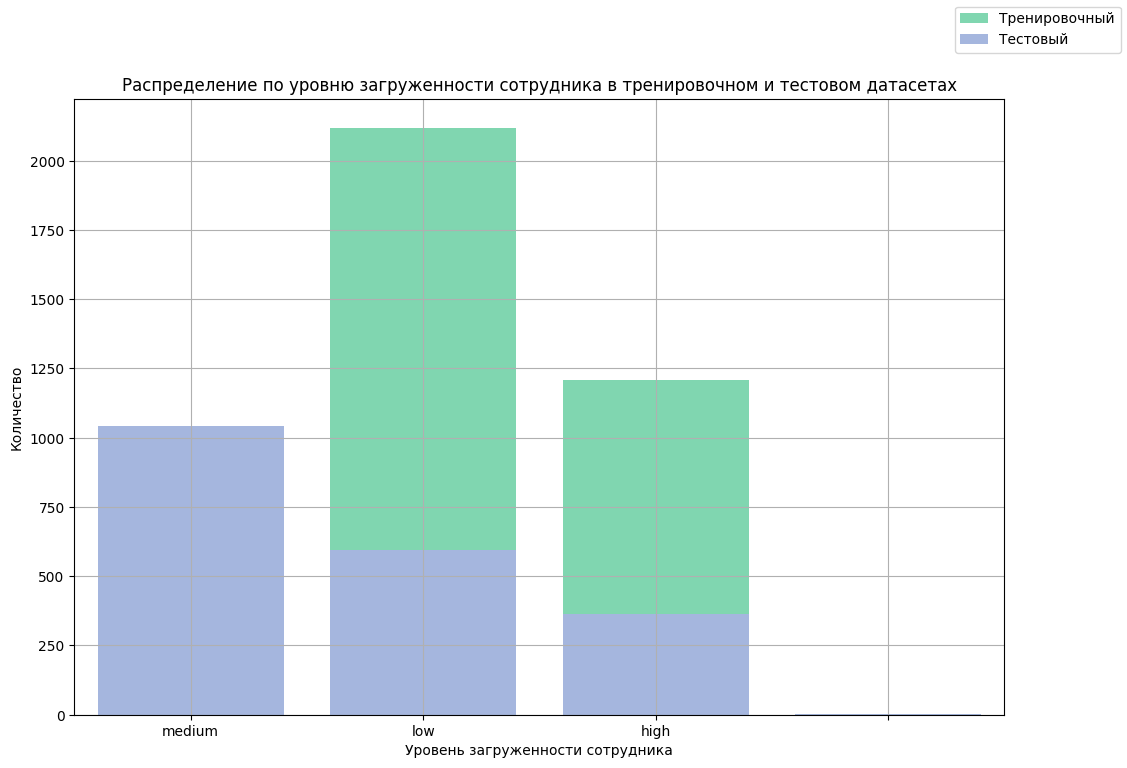

In [96]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_quit, x='workload', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='workload', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Уровень загруженности сотрудника", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по уровню загруженности сотрудника в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

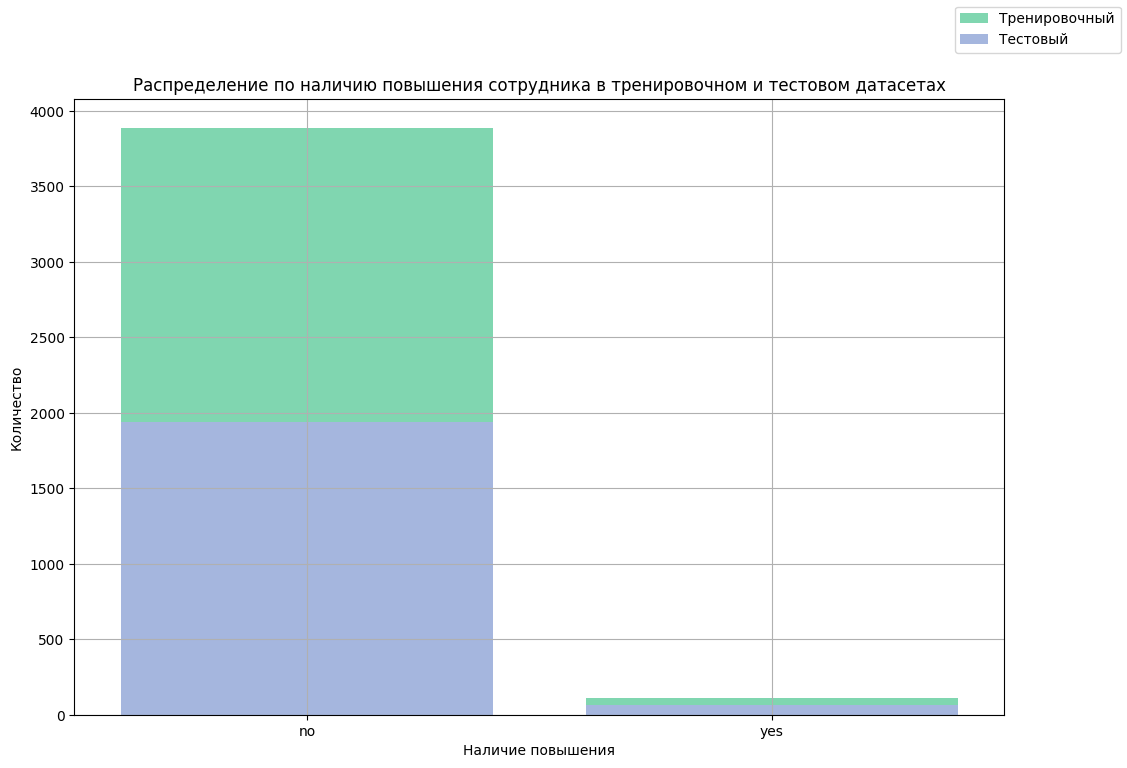

In [97]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_quit, x='last_year_promo', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='last_year_promo', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Наличие повышения", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по наличию повышения сотрудника в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

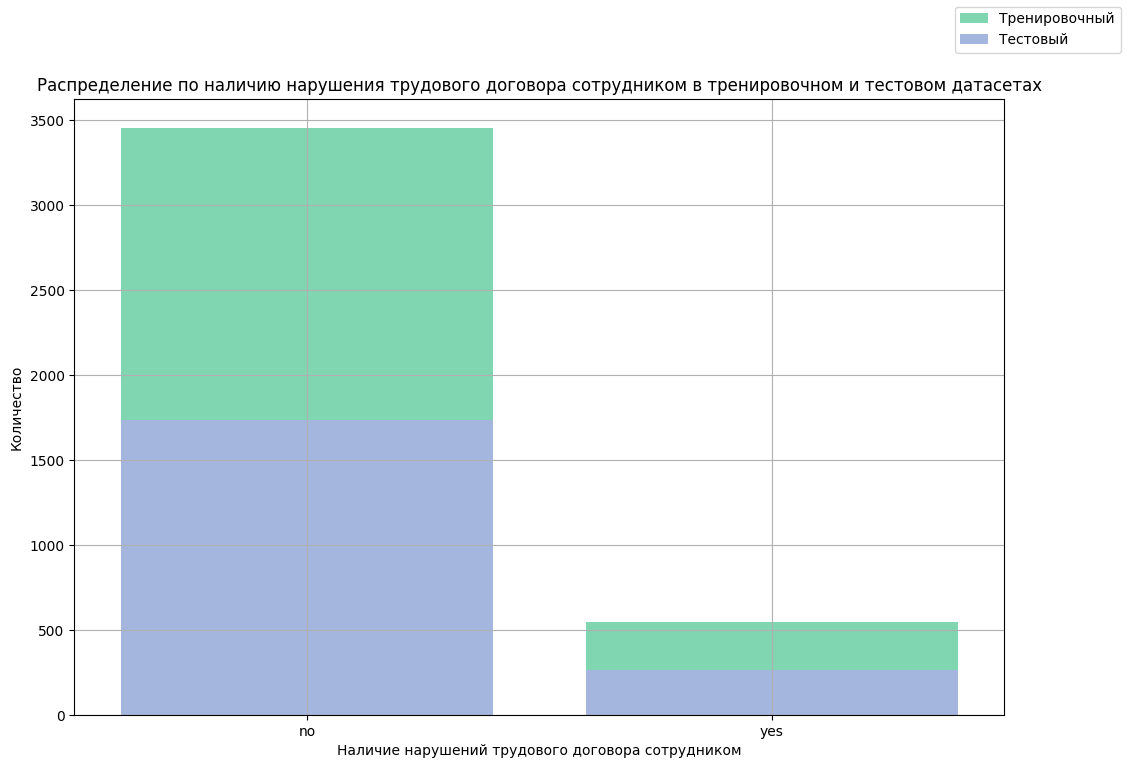

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_quit, x='last_year_violations', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='last_year_violations', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Наличие нарушений трудового договора сотрудником", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по наличию нарушения трудового договора сотрудником в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

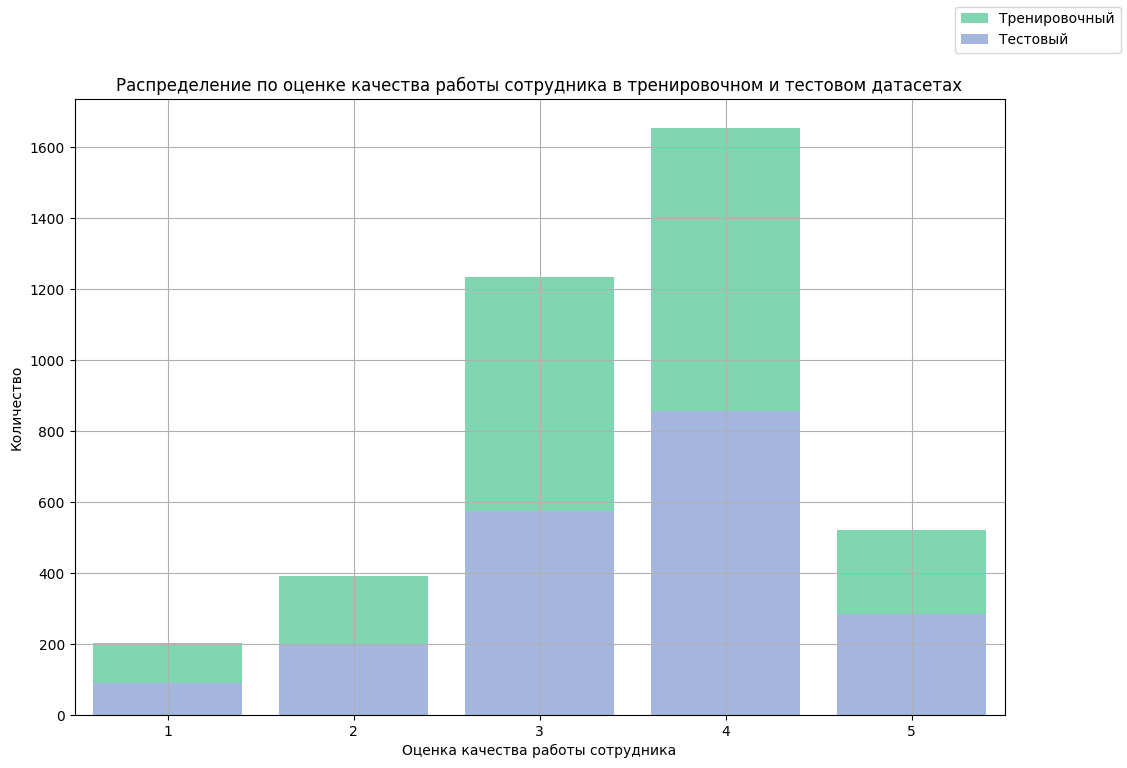

In [99]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_quit, x='supervisor_evaluation', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='supervisor_evaluation', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Оценка качества работы сотрудника", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по оценке качества работы сотрудника в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

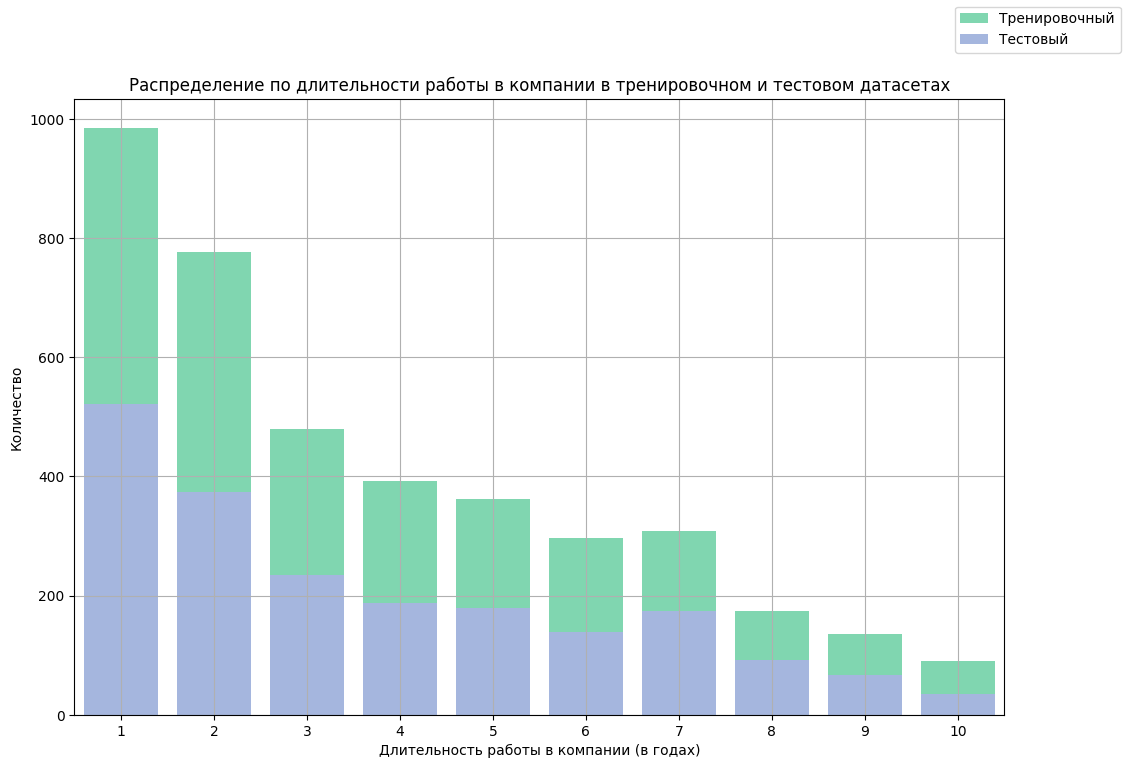

In [100]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=train_quit, x='employment_years', color='#72E4B2', label='Тренировочный')
ax = sns.countplot(data=test_features, x='employment_years', color='#9BB2E8', label='Тестовый')
ax.set(xlabel="Длительность работы в компании (в годах)", ylabel="Количество")
plt.figlegend()
plt.title('Распределение по длительности работы в компании в тренировочном и тестовом датасетах')
plt.grid()
plt.show()

**Построим гистограммы и boxplot для непрервыных признаков признаков тренировочного датасета**

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


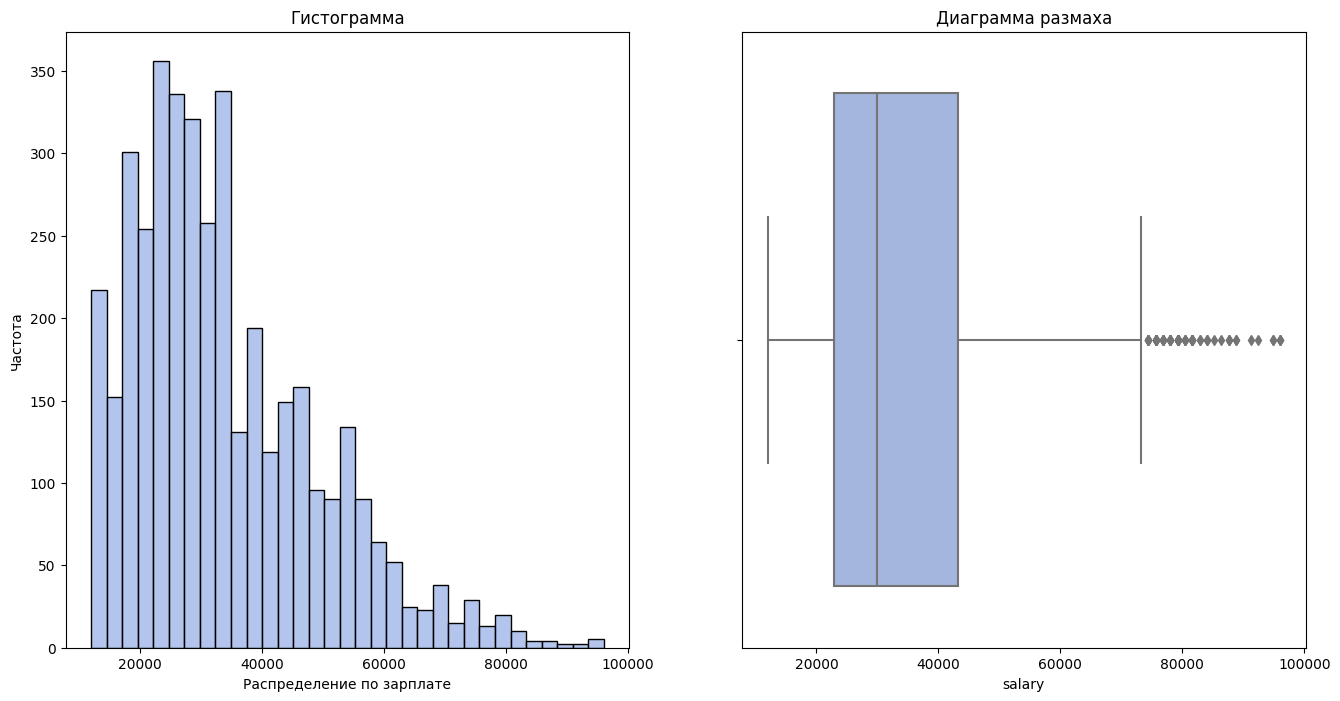

In [101]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = train_quit, x = 'salary', ax=axs[0], color='#9BB2E8')
axs[0].set_xlabel('Распределение по зарплате')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = train_quit, x = 'salary', ax=axs[1], color='#9BB2E8')
axs[1].set_title('Диаграмма размаха')
plt.show()

In [102]:
train_quit['salary'].describe()

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


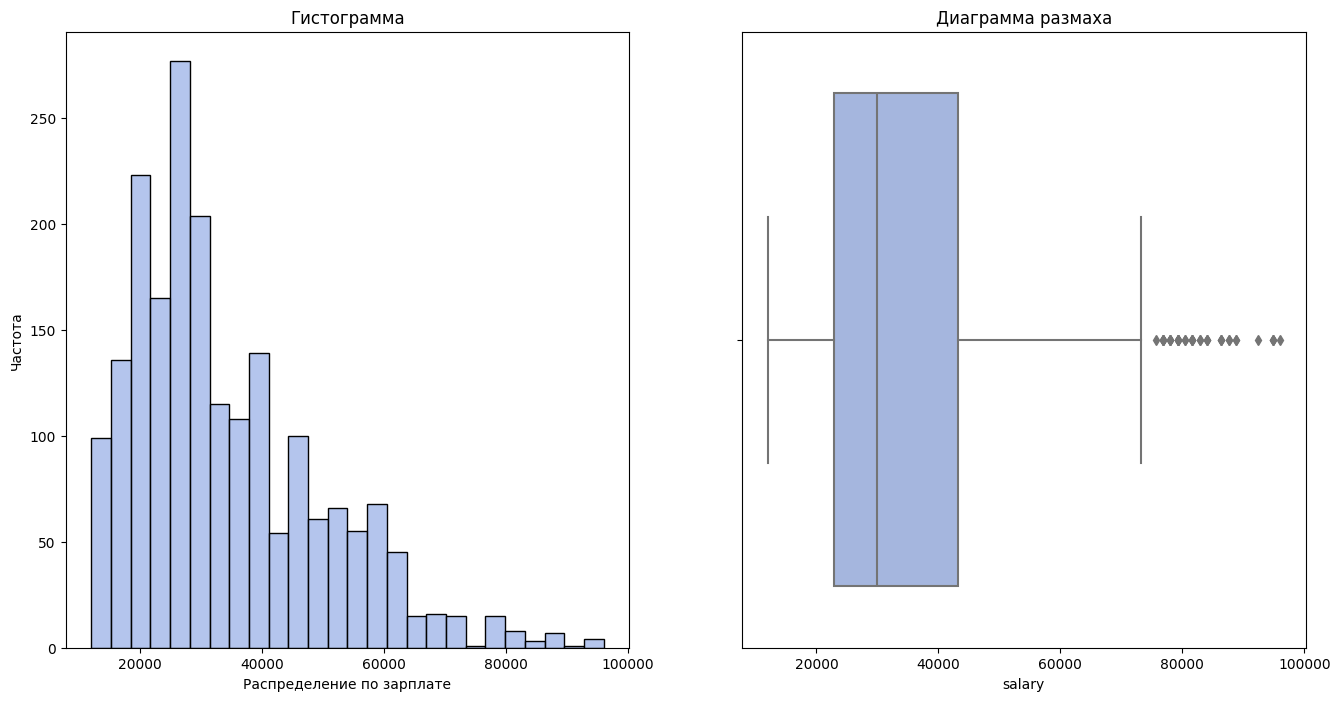

In [103]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = test_features, x = 'salary', ax=axs[0], color='#9BB2E8')
axs[0].set_xlabel('Распределение по зарплате')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = test_features, x = 'salary', ax=axs[1], color='#9BB2E8')
axs[1].set_title('Диаграмма размаха')
plt.show()

In [104]:
test_features['salary'].describe()

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

**Вывод**:
    
1. Целевой признак в тренировочном и тестовом датасете распределен неравномерно.
2. Признаки "уровень загруженности", "распределение по отделам" в тренировочном и тестовом датасетах распределны неравномерно
3. Аномальных значений нет. В столбце "Зарплата сотрудника", есть выбивающиеся значения, но их нельзя считать аномалиями, скорее всего это зарплата руководства компании.

### Составим портрет "уволившегося сотрудника"

In [105]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [106]:
train_quit_yes = train_quit[train_quit['quit']=='yes']
train_quit_yes.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


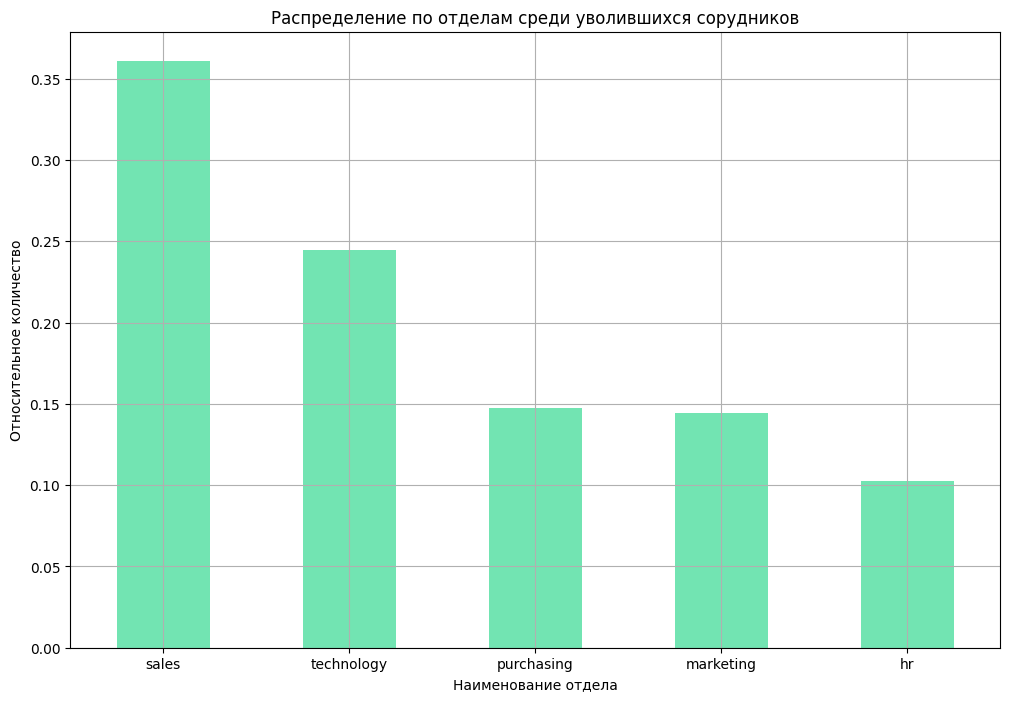

In [107]:
plt.figure(figsize=(12, 8))
train_quit_yes['dept'].value_counts(normalize=True).plot(kind='bar', color='#72E4B2')
plt.xlabel("Наименование отдела")
plt.ylabel("Относительное количество")
plt.title('Распределение по отделам среди уволившихся сорудников')
plt.xticks(rotation=0)
plt.grid()
plt.show()

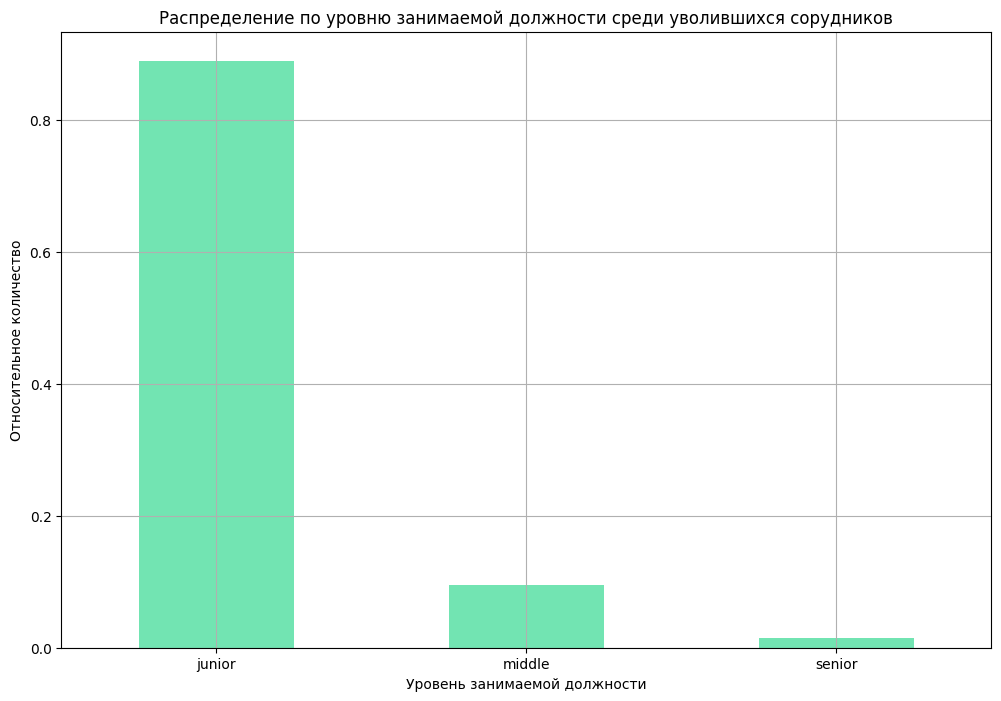

In [108]:
plt.figure(figsize=(12, 8))
train_quit_yes['level'].value_counts(normalize=True).plot(kind='bar', color='#72E4B2')
plt.xlabel("Уровень занимаемой должности")
plt.ylabel("Относительное количество")
plt.title('Распределение по уровню занимаемой должности среди уволившихся сорудников')
plt.xticks(rotation=0)
plt.grid()
plt.show()

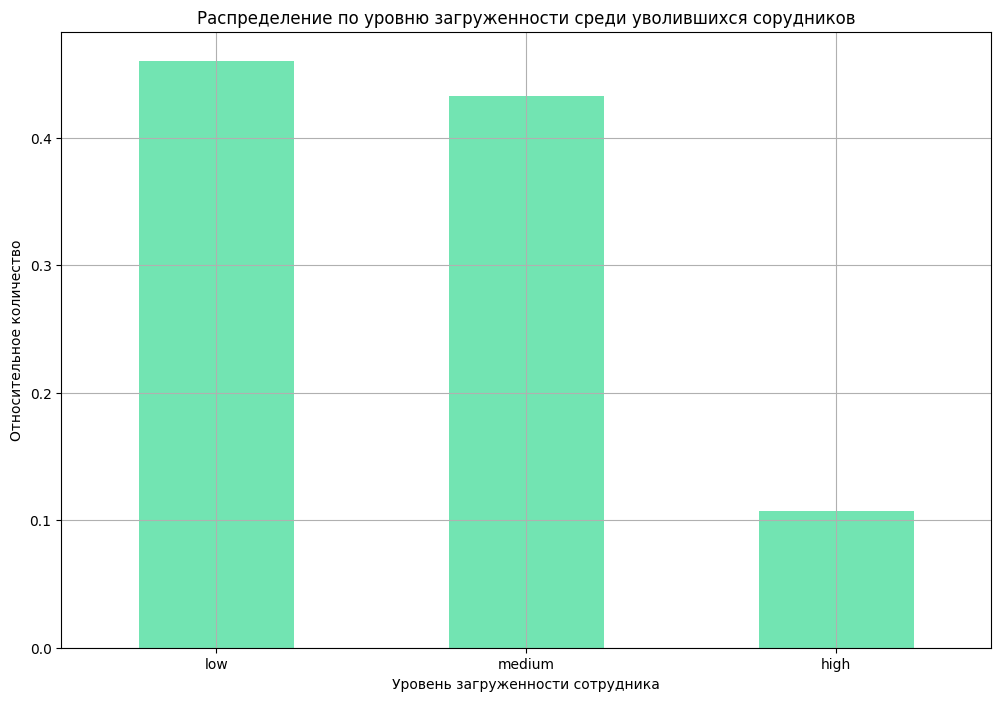

In [109]:
plt.figure(figsize=(12, 8))
train_quit_yes['workload'].value_counts(normalize=True).plot(kind='bar', color='#72E4B2')
plt.xlabel("Уровень загруженности сотрудника")
plt.ylabel("Относительное количество")
plt.title('Распределение по уровню загруженности среди уволившихся сорудников')
plt.xticks(rotation=0)
plt.grid()
plt.show()

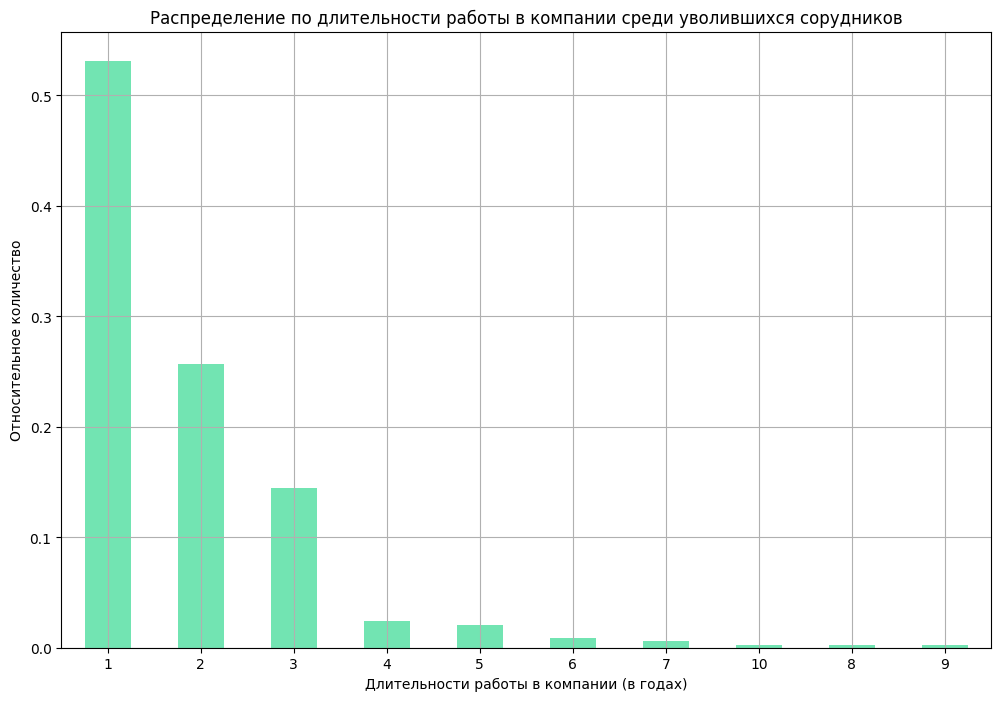

In [110]:
plt.figure(figsize=(12, 8))
train_quit_yes['employment_years'].value_counts(normalize=True).plot(kind='bar', color='#72E4B2')
plt.xlabel("Длительности работы в компании (в годах)")
plt.ylabel("Относительное количество")
plt.title('Распределение по длительности работы в компании среди уволившихся сорудников')
plt.xticks(rotation=0)
plt.grid()
plt.show()

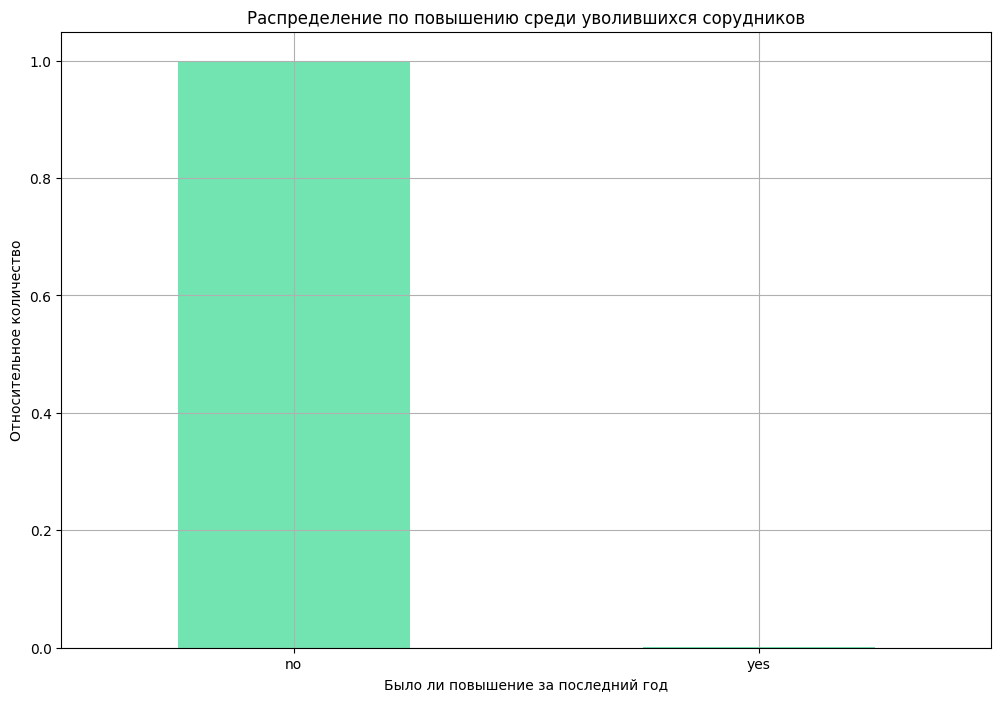

In [111]:
plt.figure(figsize=(12, 8))
train_quit_yes['last_year_promo'].value_counts(normalize=True).plot(kind='bar', color='#72E4B2')
plt.xlabel("Было ли повышение за последний год")
plt.ylabel("Относительное количество")
plt.title('Распределение по повышению среди уволившихся сорудников')
plt.xticks(rotation=0)
plt.grid()
plt.show()

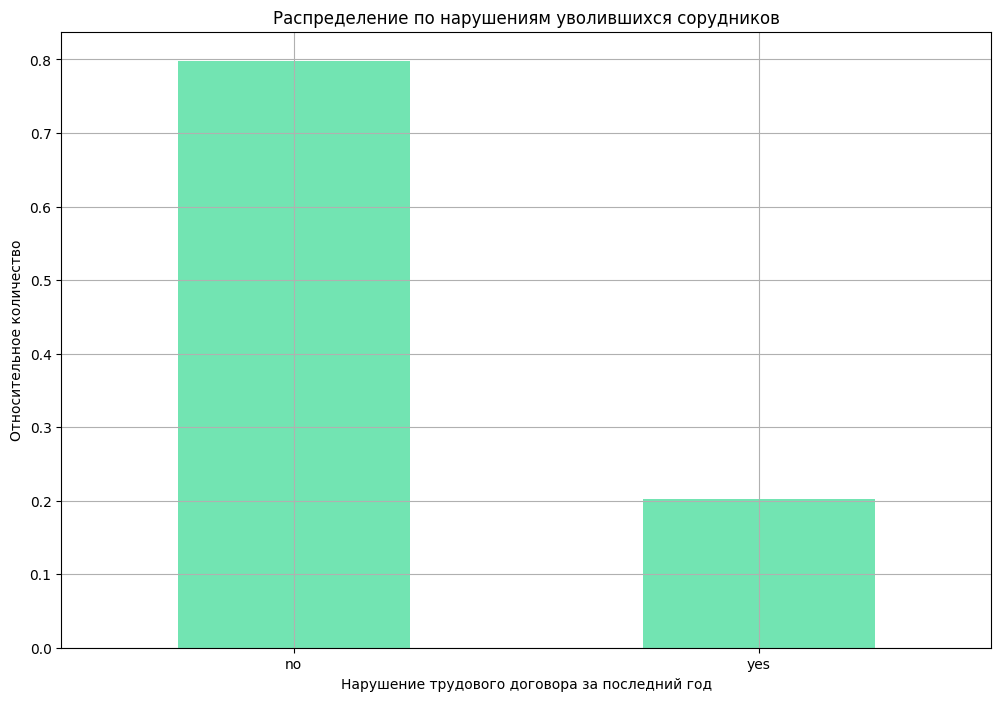

In [112]:
plt.figure(figsize=(12, 8))
train_quit_yes['last_year_violations'].value_counts(normalize=True).plot(kind='bar', color='#72E4B2')
plt.xlabel("Нарушение трудового договора за последний год")
plt.ylabel("Относительное количество")
plt.title('Распределение по нарушениям уволившихся сорудников')
plt.grid()
plt.xticks(rotation=0)
plt.show()

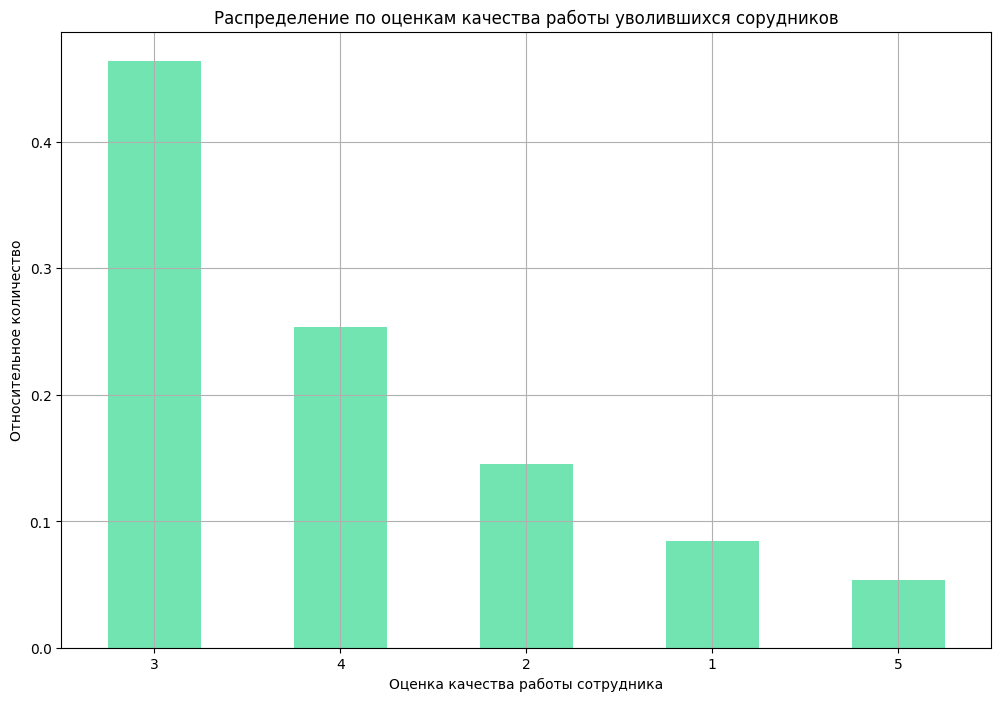

In [113]:
plt.figure(figsize=(12, 8))
train_quit_yes['supervisor_evaluation'].value_counts(normalize=True).plot(kind='bar', color='#72E4B2')
plt.xlabel("Оценка качества работы сотрудника")
plt.ylabel("Относительное количество")
plt.title('Распределение по оценкам качества работы уволившихся сорудников')
plt.xticks(rotation=0)
plt.grid()
plt.show()

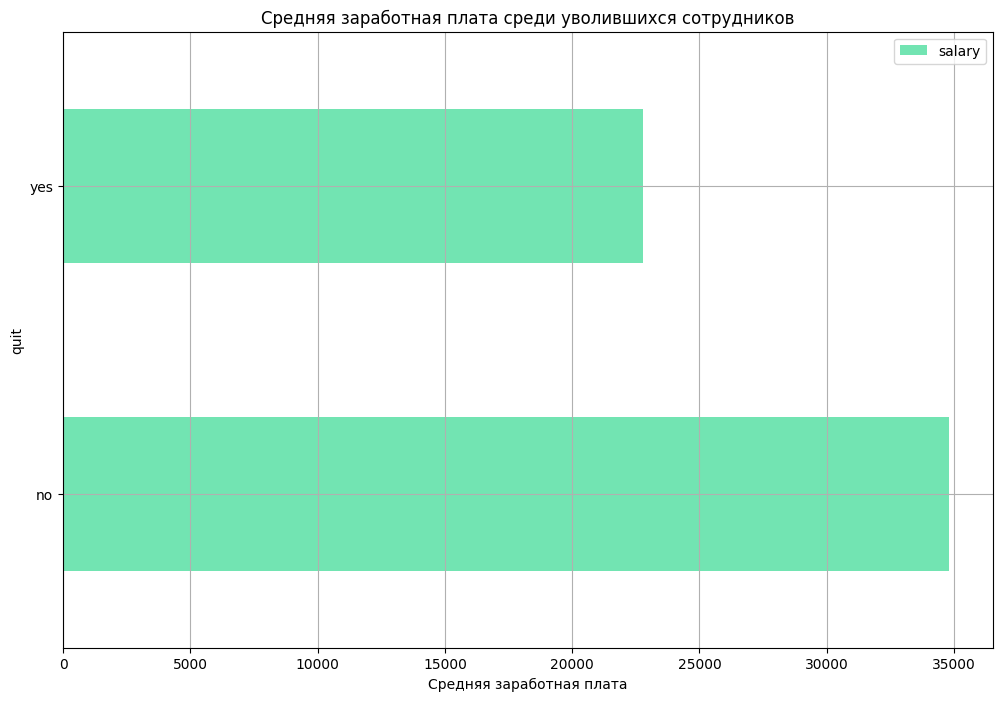

In [114]:
train_quit.pivot_table(index='quit', values='salary', aggfunc='median').plot(kind='barh', figsize=(12,8), color='#72E4B2')
plt.title('Средняя заработная плата среди уволившихся сотрудников')
plt.xlabel('Средняя заработная плата')
plt.grid()
plt.show()

**Вывод**:
    
Чаще всего увольняются в отделе продаж, но скорее всего это связано с тем, что в этом отделе работает большинство сотрудников компании. Джуны увольняются гораздо чаще, чем миддлы и сеньоры. Сотрдники с минимальной и средней загруженностью также увольняются чаще. Чаще увольняются сотрудники, проработвшие всего год в компании, после 4 лет работы количество увольнений резко снижается. Среди сотрудников, получивших повышение в последний год уволившихся гораздо меньше. Среди уволившихся большинство не нарушали трудовой договор, но это связано с тем, что нарушиений трудового договора в целом в компании меньше. Чаще всего увольняются сотрудники с оценкой 3.
Средняя заработна плата уволившегося сотрудника составляет 23 тысячи.

### Зависимость вероятности увольнения сотрудника от уровня удовлетворенности

In [115]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [116]:
test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [117]:
test_target_train_job.head()

,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08


In [118]:
test_features.set_index('id', inplace=True)
test_target_quit.set_index('id', inplace=True)
test_features = test_features.join(test_target_quit)
test_final = test_features.join(test_target_train_job)
test_final.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.79
686555,hr,junior,medium,1,no,no,4,30000,no,0.72
467458,sales,middle,low,5,no,no,4,19200,no,0.64
418655,sales,middle,low,6,no,no,4,19200,no,0.60
789145,hr,middle,medium,5,no,no,5,40800,no,0.75


C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


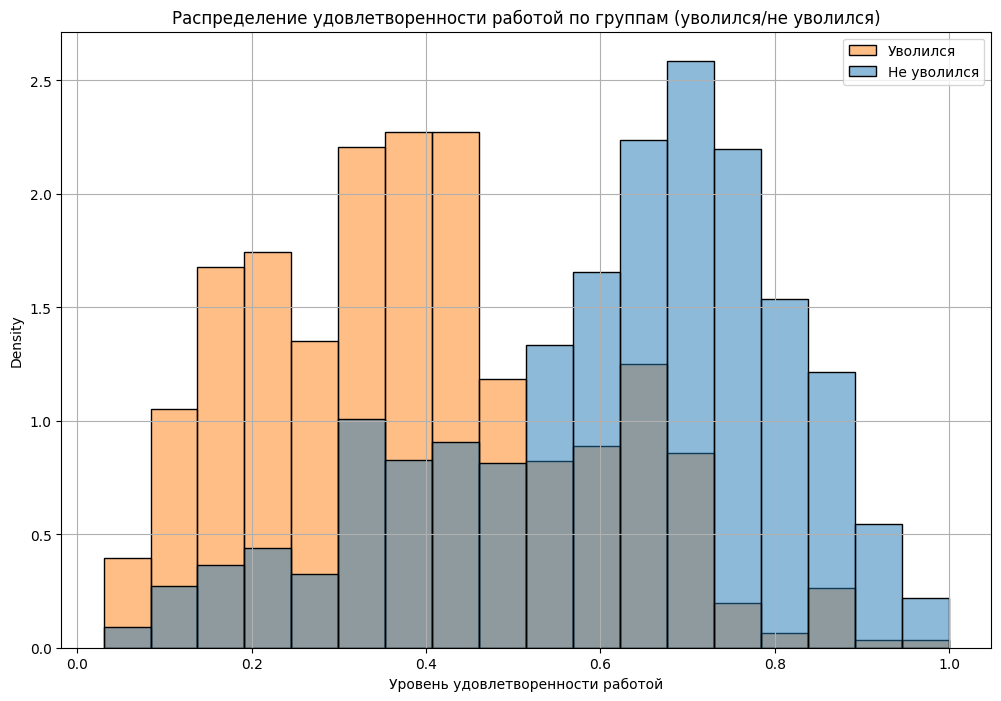

In [119]:
plt.figure(figsize=(12, 8))
sns.histplot(data=test_final, x='job_satisfaction_rate', hue='quit', stat='density', common_norm=False)
plt.title('Распределение удовлетворенности работой по группам (уволился/не уволился)')
plt.xlabel('Уровень удовлетворенности работой')
plt.legend(labels=['Уволился', 'Не уволился'])
plt.grid()
plt.show()

Уровень удовлетворенности сотрудника работой действительно влияет на вероятность увольнения, у сотрудники с низким уровенем удовлетворенности, вероятность увольнения выше.

Проведем статистический тест для сравнения распределений в выборках:

H0: Средний уровень удовлетворенности работой у двух групп "уволился" и "не уволился" равен.

H1: Средний уровень удовлетворенности работой у группы "уволился" больше, чем у группы "не уволиллся".

In [120]:
test_final_quit_yes = test_final[test_final['quit']=='yes']
test_final_quit_no = test_final[test_final['quit']=='no']

In [121]:
alpha = 0.05
test_final_quit_yes = test_final_quit_yes['job_satisfaction_rate']
test_final_quit_no = test_final_quit_no['job_satisfaction_rate']
results = st.ttest_ind( test_final_quit_yes, test_final_quit_no, alternative='greater')
print('P-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


Статистический тест показал, что мы не можем утверждать, что средний уровень удовлетворенности уволившихся работников меньше, так как мы не смоги отвергнуть нулевую гипотезу.

## Добавление нового входного признака

Добавим новый признак в тестовую выборку

In [122]:
y_pred_result.head()

,job_satisfaction_rate
id,
485046,0.885000
686555,0.682222
467458,0.652000
418655,0.666000
789145,0.825556


Объединим таблицы

In [123]:
X_test_result = test_features.merge(y_pred_result, left_index=True, right_index=True, how='inner')
X_test_result.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.885000
686555,hr,junior,medium,1,no,no,4,30000,no,0.682222
467458,sales,middle,low,5,no,no,4,19200,no,0.652000
418655,sales,middle,low,6,no,no,4,19200,no,0.666000
789145,hr,middle,medium,5,no,no,5,40800,no,0.825556


In [124]:
train_quit.set_index('id', inplace=True)
train_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


In [125]:
y_test_result = test_final.loc[X_test_result.index, 'quit']
y_test_result.head()

id
485046    no
686555    no
467458    no
418655    no
789145    no
Name: quit, dtype: object

In [126]:
y_train_result = train_quit['quit']
X_train_result = train_quit.drop(columns=['quit'])
X_train_result.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000
814010,sales,junior,medium,2,no,no,4,27600
155091,purchasing,middle,medium,5,no,no,1,37200
257132,sales,junior,medium,2,no,yes,3,24000
910140,marketing,junior,medium,2,no,no,5,25200


In [127]:
X_train_result_pred = randomized_search.best_estimator_.predict(X_train_result)
X_train_result_pred = pd.DataFrame(X_train_result_pred, index=X_train_result.index, columns=['job_satisfaction_rate'])
X_train_result_pred.head()

,job_satisfaction_rate
id,
723290,0.648000
814010,0.846364
155091,0.340000
257132,0.340000
910140,0.690000


Добавим новый признак в тренировочную выборку

In [128]:
X_train_result = X_train_result.merge(X_train_result_pred, left_index=True, right_index=True)
X_train_result.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.648000
814010,sales,junior,medium,2,no,no,4,27600,0.846364
155091,purchasing,middle,medium,5,no,no,1,37200,0.340000
257132,sales,junior,medium,2,no,yes,3,24000,0.340000
910140,marketing,junior,medium,2,no,no,5,25200,0.690000


## Подготовка признаков

In [129]:
label_encoder = LabelEncoder()
y_train_result = label_encoder.fit_transform(y_train_result)
y_test_result = label_encoder.transform(y_test_result)

In [130]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary', 'job_satisfaction_rate']

In [131]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [132]:
ord_pipe = Pipeline(
    [
        ('simpleImputer_ord_before', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('num', OrdinalEncoder(
            categories=[
                ['junior', 'middle', 'sinior'],
                ['medium', 'high', 'low']
            ],
            handle_unknown='use_encoded_value', unknown_value=np.nan
        )),
        ('simpleImputer_ord_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [133]:
num_pipe = Pipeline(
    [
        ('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

In [134]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', num_pipe, num_columns)
    ],
    remainder='passthrough'
)

In [135]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE)) 
    ]  
)

In [136]:
param_grid = [
    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 5),
        'models__min_samples_leaf': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
     # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=3000)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__C': range(1, 5)
    },
    # словарь для модели SVC()
    {
       'models': [SVC(random_state=RANDOM_STATE, probability=True)],    
    }
]

## Обучение модели

In [137]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=20
)

In [138]:
randomized_search.fit(X_train_result, y_train_result)

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'models__min_samples_leaf': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(max_iter=3000,
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)]}],
                   random_state=42, scoring='roc_auc')

In [139]:
randomized_search.best_score_

0.9294483305664419

In [140]:
y_test_pred_proba = randomized_search.predict_proba(X_test_result)
y_test_pred_proba

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.95238095, 0.04761905],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       ...,
       [0.0952381 , 0.9047619 ],
       [0.9047619 , 0.0952381 ],
       [0.9047619 , 0.0952381 ]])

In [141]:
y_test_pred = randomized_search.predict(X_test_result)
y_test_pred

C:\Users\peredkova\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0])

In [142]:
roc_auc_score(y_test_result, y_test_pred_proba[:, 1])

0.9183956005803067

In [147]:
y_test_pred = pd.DataFrame(y_test_pred, index=X_test_result.index, columns=['quit'])
y_test_pred.head()

,quit
id,
485046,0
686555,0
467458,0
418655,0
789145,0


In [148]:
result = X_test_result.merge(y_test_pred, left_index=True, right_index=True, how='inner')
result.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit_x,job_satisfaction_rate,quit_y
id,,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.885000,0
686555,hr,junior,medium,1,no,no,4,30000,no,0.682222,0
467458,sales,middle,low,5,no,no,4,19200,no,0.652000,0
418655,sales,middle,low,6,no,no,4,19200,no,0.666000,0
789145,hr,middle,medium,5,no,no,5,40800,no,0.825556,0


In [149]:
result.replace({1: 'yes', 0: 'no'}, inplace=True)
result.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit_x,job_satisfaction_rate,quit_y
id,,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.885000,no
686555,hr,junior,medium,yes,no,no,4,30000,no,0.682222,no
467458,sales,middle,low,5,no,no,4,19200,no,0.652000,no
418655,sales,middle,low,6,no,no,4,19200,no,0.666000,no
789145,hr,middle,medium,5,no,no,5,40800,no,0.825556,no


**Вывод**:
    
Лучше всего справилась модель KNeighborsClassifier с количеством ближайших соседей - 15, метрика ROC-AUC=0.92 на кросс валидации и 0,91 на тестовой выборке.

Выполним оценку модели на адекватность

In [146]:
dummy_model_class = DummyClassifier(random_state=RANDOM_STATE)
dummy_model_class.fit(X_train_result, y_train_result)

dummy_model_class_preds = dummy_model_class.predict(X_test_result)

dummy_model_class_preds = roc_auc_score(y_test_result, dummy_model_class_preds)
dummy_model_class_preds

0.5

Метрика получилась ниже выбранной модели, подбор модели оправдал себя.


## Общий вывод

В данном проекте я выполнила следующие шаги:
* **Выполнила предобработку данных:** 
    * Заполнила пропущенные значения
    * Аномальных значений и дубликатов не обнаружено
    
* **Провела исследовательский анализ данных:**
    * Для первой и второй задачи посмотрела, как разпределены категориальные признаки в тренировочном и тестовом датасете
    * Построила гистограммы и boxplot для числовый признаков
    * Для второй задачи составила портрет "уволившегося сотрудника". Чаще всего это джуны, сотрудники, которые работают меньше двух лет и нарушают трудовой договор. Среди тех, кто получил повышение за последний год не уволился никто. Заработная плата также влияет на вероятность увольнения сотрудника: чем она меньше, тем вероятность выше
    * Выяснила, что уровень удовлетворенности сотрудника работой в компании сильно влияет на вероятность увольнения. Добавила пердсказанные значения этого признака в первой задаче к входным данным второй задачи.

* **Провела корреляционный анализ данных:**
    * Построила тепловую карту и рассчитала коэффицианты корреляции; 
    * Мультиколлинеарность не была обнаружена.

* **Моей первой задачей была задача регрессии. Мне нужно было предсказать уровень удовлетворенности сотрудников компании. Используя пайплайны я обучила 2 модели"**
    * модель линейной регрессии
    * модель дерева решений

Лучшие показатели получились у дерева решений. С помощью метрики SMAPE оценила качество работы модели. Лучшая метрика на кросс валидации - 15,6 на тестовой выборке 13,9.

* **Моей второй была задача бинарной классификациии. Мне нужно было предсказать, уволится ли сотрудник из компании. Используя пайплайны я обучила 4 модели с помощью**
    * метода ближайших соседей
    * дерева решений
    * логистической регрессии
    * метода опорных векторов
    
Для оценки качества модели использовала метрику ROC-AUC, так как присутсвует дисбаланс классов. Лучше моделью стала KNeighborsClassifier с количеством ближайших соседей - 15. 

roc_auc = 0.92 на кросс-валидации и 0,91 на тестовых данных.
В итоге был получен итоговый датасет с предсказаниями.

**Рекомендации для бизнеса:**

Чтобы сократить количество увольнений в компании необходимо больше времени уделять джунам, потому что текучка в основном наблюдаются среди них. Давать им интересные задачи и несомненно повышать заработную плату.